In [57]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from wordcloud import WordCloud
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import os

In [36]:
df1 = pd.read_csv('new_File1.csv')
df2 = pd.read_csv('new_File2.csv')

In [37]:
df1

,Age,Gender,School,Start Date,End Date,Internship Goals,School d'pt,Stack,Highest Level of Education Completed
0,22,Male,NAHPI,2025-03-01,2025-08-30,Fulfill academic requirements \nImprove skills...,COMPUTER ENGINEERING,Data science,ADVANCED LEVEL
1,19,Male,COLTECH,2025-02-18,2025-03-22,1: gain practical experience in network securi...,COMPUTER ENGINEERING,Cyber security,ADVANCED LEVEL
2,21,Male,NAHPI,2025-03-19,2025-09-19,Gain development skill\nnetworking\ngain pract...,COMPUTER ENGINEERING,Back-end,ADVANCED LEVEL
3,19,Male,COLTECH,2025-02-18,2025-02-18,These are some of my goals for the internship ...,COMPUTER ENGINEERING,Cyber security,ADVANCED LEVEL
4,20,Male,COLTECH,2025-02-21,2025-03-22,"1. Learning the basics on html, css and javasc...",COMPUTER ENGINEERING,Front-end,ADVANCED LEVEL
5,20,Male,NAHPI,2025-02-18,2025-08-29,- To build my software development skills\n- T...,COMPUTER ENGINEERING,Back-end,ADVANCED LEVEL
6,20,Male,COLTECH,2025-02-12,2025-03-31,-get better at coding \n-be so good that I can...,COMPUTER ENGINEERING,Front-end,ADVANCED LEVEL
7,19,Female,COLTECH,2025-02-18,2025-03-31,User did not input anything,COMPUTER ENGINEERING,Front-end,ADVANCED LEVEL
8,22,Female,NAHPI,2025-03-18,2025-05-18,To know how to program using python \nTo do ma...,BIOMEDICAL ENGINEERING,Data science,ADVANCED LEVEL
9,21,Female,NAHPI,2025-02-18,2025-05-18,Learn how to code in Python\nAcquire skills in...,BIOMEDICAL ENGINEERING,Data science,ADVANCED LEVEL


In [38]:
df2

,abt_skye8,why_skye8,is_first_time_at_skye8,department,Intern_rating,Alligiment_of_task_with_school,why,Gained_skils,Sufficiency_of_resources,How approachable and supportive are the supervisors?,...,Description_of_working_environment,how_inclusive_you_fet_into_the_team,valued_as_intern,was_encouraged_to_share_ideas,challenges_faced,how_skye8_cam_improve_intern_satisfaction,how_satified_are_interns,will_recomend_internship_to_others,would_like_to_work_at_skye8,additional_comment
0,Friends/Family,I actually did internship in year1 at skye8 so...,No,Back-end,Good,Yes,The task provided actually help us practicaliz...,I'm still starting internship.,Yes,Good,...,"The work environment is friendly, good, intera...",4,3,Yes,I'm still starting out the internship.,Creation of outdoor activities per time.,7,Yes,Yes,User did not input anything
1,Social Media,Because I heard of their innovative dreams of ...,Yes,Front-end,Good,Yes,Because all the tasks given align to the front...,As a newbie in the front end development strea...,Yes,Satisfactory,...,Learning focused,4,4,Yes,Unclear expectations,User did not input anything,8,Yes,Yes,User did not input anything
2,Friends/Family,because they separate interns into different s...,No,Front-end,Good,Yes,"the tasks we get concern only our department, ...",how to work with teams and manage work files,Yes,Good,...,"Friendly, stressful, fun, learning-focused",4,3,Yes,Mostly the time for task completion was not th...,"actually, I think they are doing a great job, ...",8,Yes,Yes,nope noting in mind
3,Friends/Family,Mainly because it's closest to my home and als...,Yes,Back-end,Very good,Yes,My academic goal is to acquire enough skills a...,Backend development -- very productive\nMy cri...,Yes,Very good,...,"Friendly, learning-focused, professional and fun",5,4,Yes,poor communication amongst interns,Better communication overall,9,Yes,Yes,Nothing else
4,Friends/Family,Because it was the best choice I had,No,Front-end,Good,Yes,I have learnt a lot,"I have gain knowledge in HTML,CSS, and JavaScript",Yes,Good,...,"stressful ,friendly",3,3,Maybe,"high work load, unclear expectation",More structured training (possibly an outline ...,5,Maybe,Maybe,User did not input anything
5,Friends/Family,I choose Skye8 because it have a good reputati...,Yes,Data science,Very good,Yes,Because they task given were concern with my f...,Learn professional basics,Yes,Very good,...,Friendly,5,5,Yes,Unclear expectations,Should make interaction with more people outsi...,8,Yes,Yes,Some days apart from Saturday \nStudents can w...
6,Friends/Family,I choosed skye8 because I got very positive re...,Yes,Front-end,Satisfactory,Yes,The projects assigned to me where quite challe...,"I have enhanced my skills on html, css and js",Yes,Good,...,The work environment at skye8 is very friendly...,4,1,Yes,The only challenge I face at skye8 is the subm...,I think skye8 can improve on task time schedul...,6,Yes,Yes,User did not input anything
7,Friends/Family,Because it help to build the future,Yes,Front-end,Good,Yes,because it been a help to me,i have gain alot all thanks to my supervisor,Yes,Good,...,Friendly,5,1,Yes,Faced alot with the JavaScript,More structured training,10,Yes,Yes,I will love to come to Skye8 because it very g...
8,Social Media,Because I believe that I can gain the skills I...,No,Front-end,Good,Yes,The task assigned to me where quite challengin...,I have gain a lot but not yet applicable,Yes,Satisfactory,...,Learning-focused,3,3,Maybe,Poor communication,More structured training,5,Yes,Yes,User did not input anything
9,Friends/Family,Because it was the best choice i had,No,Front-end,Good,Yes,I have managed to learn a lot so far,"I have gained knowledge in HTML,CSS and JavaS...",Yes,Good,...,"stressful, friendly",3,3,Maybe,High workload\nUnclear expectations\nMental ex...,Make a course outline of what the interns are ...,5,Maybe,Maybe,User did not input anything


C:\Users\Dell\AppData\Local\Temp\ipykernel_28088\2918393758.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=dept_counts.index, y=dept_counts.values, palette="coolwarm")


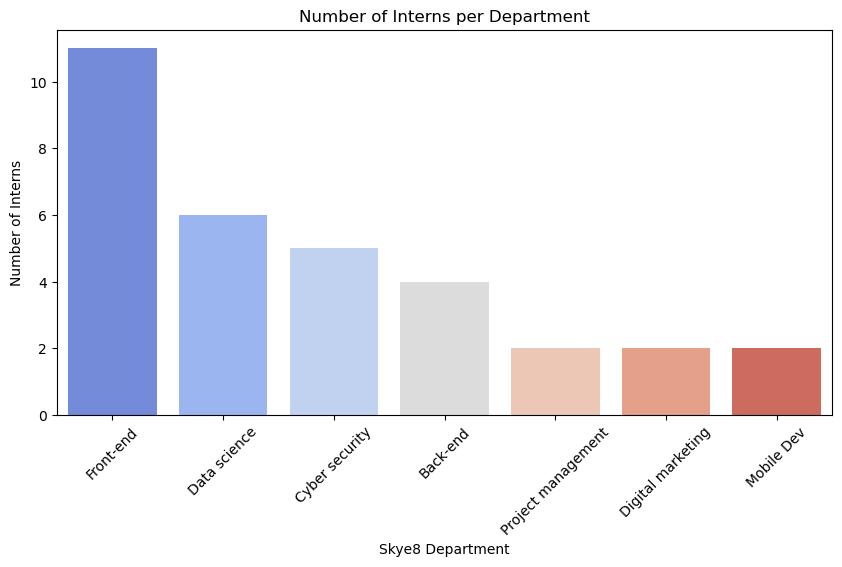

In [39]:
# Count interns per department
dept_counts = df2["department"].value_counts()

# Plot bar chart
plt.figure(figsize=(10,5))
sns.barplot(x=dept_counts.index, y=dept_counts.values, palette="coolwarm")
plt.xticks(rotation=45)
plt.xlabel("Skye8 Department")
plt.ylabel("Number of Interns")
plt.title("Number of Interns per Department")
plt.show()


School  COLTECH  ETHIST  HICM  HIPDET  NAHPI  University of Bamenda 
Gender                                                              
Female        2       1     2       1      4                       0
Male          6       5     1       0      5                       1


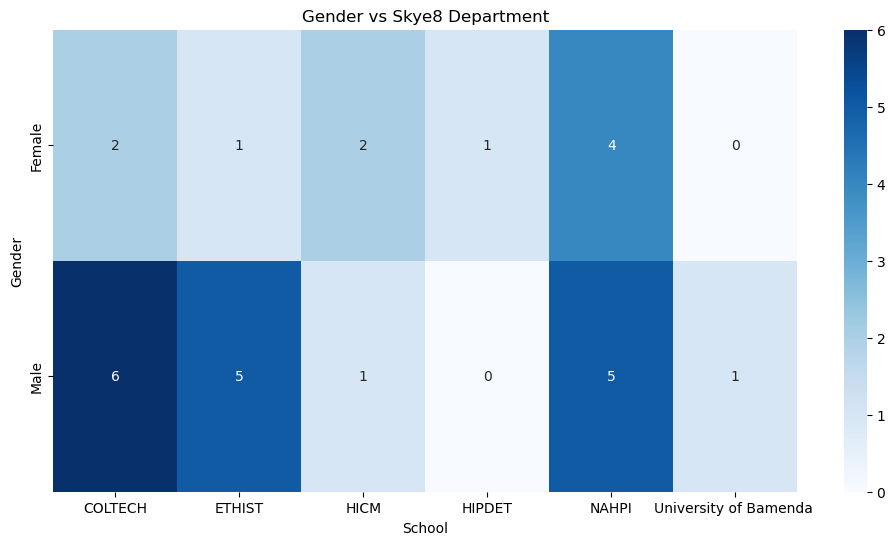

In [40]:
dept_mapping = df2.groupby([df1["Gender"], df1["School"]]).size().unstack(fill_value=0)


print(dept_mapping.head())
plt.figure(figsize=(12, 6))
sns.heatmap(dept_mapping, cmap="Blues", annot=True, fmt="d")
plt.title("Gender vs Skye8 Department")
plt.show()


In [41]:
# Convert Start_Date to datetime
df1["Start Date"] = pd.to_datetime(df1["Start Date"])

# Count interns per start date
start_counts = df1.groupby("Start Date").size().reset_index(name="Intern_Count")

# Filter where more than 1 intern started
same_start_dates = start_counts[start_counts["Intern_Count"] >= 1]
print(same_start_dates)




# Convert Start_Date to datetime
df1["End Date"] = pd.to_datetime(df1["End Date"])

# Count interns per start date
end_counts = df1.groupby("End Date").size().reset_index(name="Intern_Count")

# Filter where more than 1 intern Ended
same_end_dates = end_counts[end_counts["Intern_Count"] >= 1]
print(same_end_dates)


   Start Date  Intern_Count
0  2024-11-19             1
1  2025-02-10             1
2  2025-02-11             1
3  2025-02-12             1
4  2025-02-15             3
5  2025-02-18             9
6  2025-02-19             2
7  2025-02-20             1
8  2025-02-21             1
9  2025-02-25             2
10 2025-03-01             2
11 2025-03-18             1
12 2025-03-19             2
13 2025-11-03             1
     End Date  Intern_Count
0  2025-02-18             1
1  2025-03-01             1
2  2025-03-15             1
3  2025-03-18             2
4  2025-03-22             3
5  2025-03-27             2
6  2025-03-28             2
7  2025-03-29             2
8  2025-03-31             3
9  2025-04-01             1
10 2025-05-01             1
11 2025-05-18             2
12 2025-08-29             1
13 2025-08-30             1
14 2025-09-19             2
15 2025-09-20             1
16 2025-09-30             1
17 2025-11-09             1


C:\Users\Dell\AppData\Local\Temp\ipykernel_28088\807801756.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
C:\Users\Dell\AppData\Local\Temp\ipykernel_28088\807801756.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


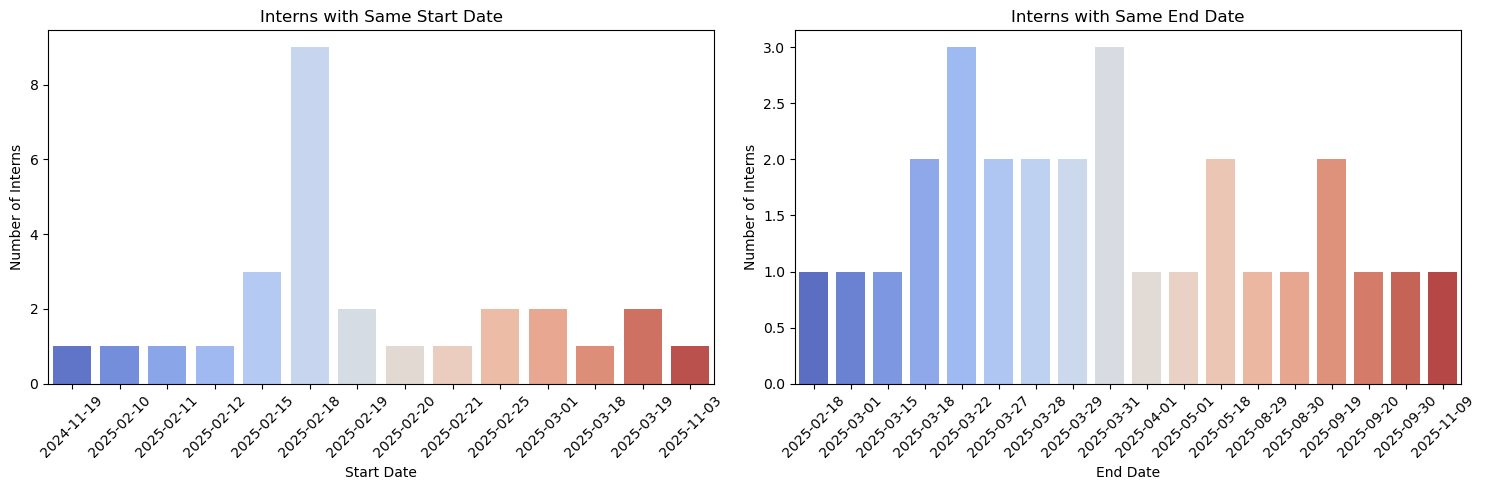

In [43]:
# Create a figure with two subplots side by side
plt.figure(figsize=(15, 5))

# First subplot for Start Dates
plt.subplot(1, 2, 1)
sns.barplot(
    data=same_start_dates,
    x='Start Date',
    y='Intern_Count',
    palette="coolwarm"
)
plt.xticks(rotation=45)
plt.xlabel("Start Date")
plt.ylabel("Number of Interns")
plt.title("Interns with Same Start Date")

# Second subplot for End Dates
plt.subplot(1, 2, 2)
sns.barplot(
    data=same_end_dates,
    x='End Date',
    y='Intern_Count',
    palette="coolwarm"
)
plt.xticks(rotation=45)
plt.xlabel("End Date")
plt.ylabel("Number of Interns")
plt.title("Interns with Same End Date")

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()


In [44]:
grp_dpt = df1['Age'].groupby(df2['department'])
dept_mean =grp_dpt.mean()
dept_mean



department
Back-end              19.666667
Cyber security        20.500000
Data science          20.000000
Digital marketing     22.000000
Front-end             20.333333
Mobile Dev            19.000000
Project management    26.000000
Name: Age, dtype: float64

C:\Users\Dell\AppData\Local\Temp\ipykernel_28088\3150114003.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot( x= dept_mean.index, y=dept_mean.values, palette="coolwarm")


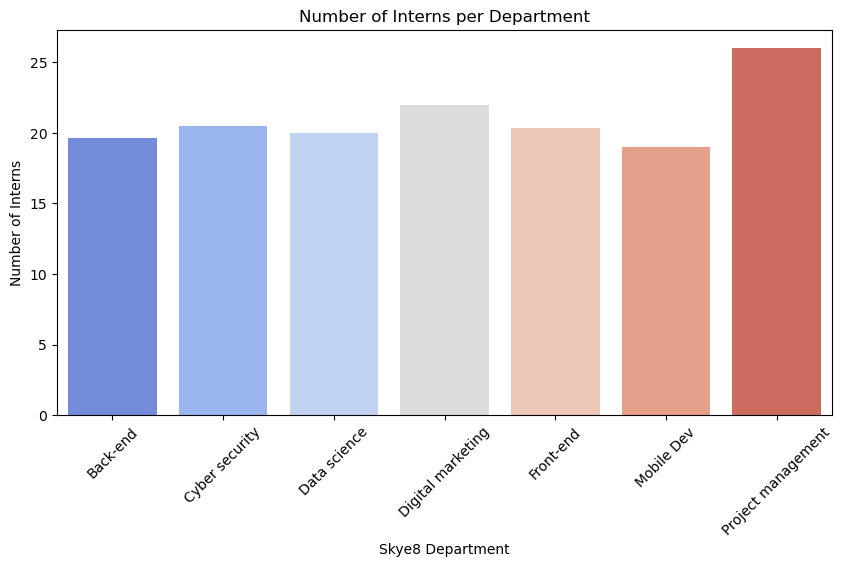

In [45]:
plt.figure(figsize=(10,5))
sns.barplot( x= dept_mean.index, y=dept_mean.values, palette="coolwarm")
plt.xticks(rotation=45)
plt.xlabel("Skye8 Department")
plt.ylabel("Number of Interns")
plt.title("Number of Interns per Department")
plt.show()

In [46]:
grp_dpt = df1['Age'].groupby(df2['department'])
dept_mean =grp_dpt.mean()
dept_mean



department
Back-end              19.666667
Cyber security        20.500000
Data science          20.000000
Digital marketing     22.000000
Front-end             20.333333
Mobile Dev            19.000000
Project management    26.000000
Name: Age, dtype: float64

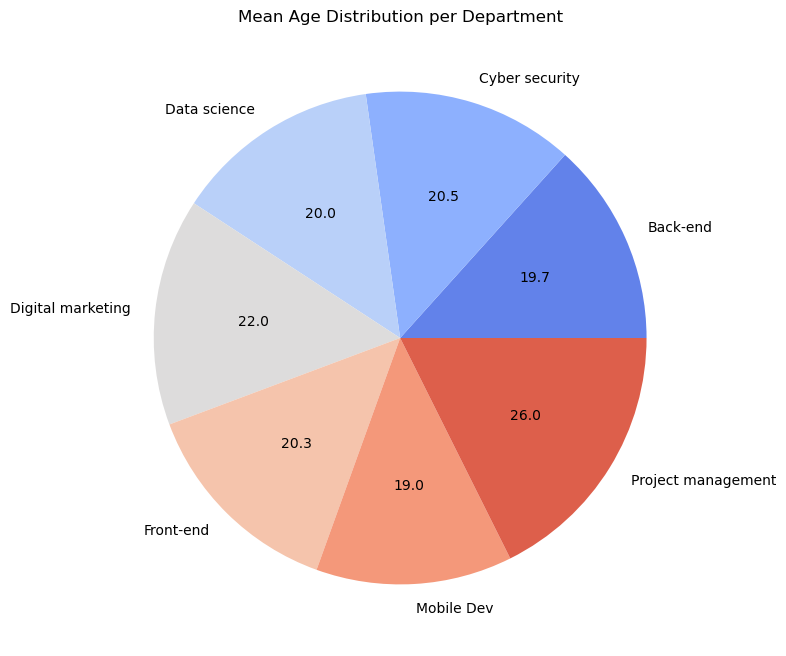

In [47]:

plt.figure(figsize=(8, 8))
plt.pie(dept_mean.values, labels=dept_mean.index,
        autopct=lambda p: '{:.1f}'.format(p * sum(dept_mean.values) / 100),
        colors=sns.color_palette("coolwarm", len(dept_mean)))

plt.title("Mean Age Distribution per Department")

plt.show()

In [51]:
university_duration = df1.groupby('School')['Internship_Duration'].mean().sort_values()
university_duration

School
HICM                       22.000000
COLTECH                    31.500000
ETHIST                     34.000000
University of Bamenda      38.000000
HIPDET                    130.000000
NAHPI                     154.222222
Name: Internship_Duration, dtype: float64

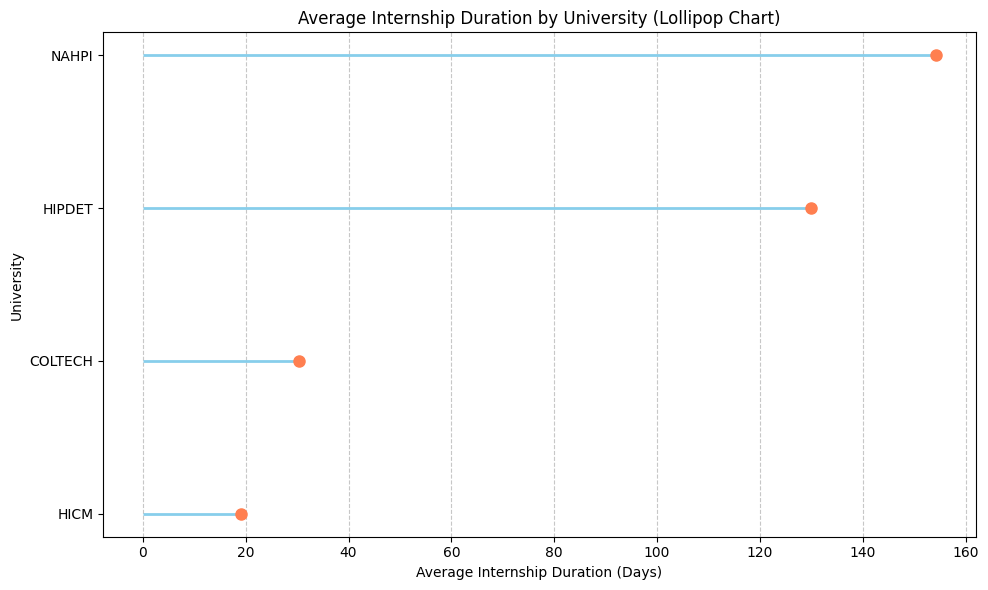

In [ ]:

plt.figure(figsize=(10, 6))
plt.hlines(y=university_duration.index, xmin=0, xmax=university_duration.values, color='skyblue', linewidth=2)
plt.plot(university_duration.values, university_duration.index, "o", markersize=8, color='coral')
plt.xlabel("Average Internship Duration (Days)")
plt.ylabel("University")
plt.title("Average Internship Duration by University (Lollipop Chart)")
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [49]:
# Convert date columns
df1["Start Date"] = pd.to_datetime(df1["Start Date"], errors="coerce")
df1["End Date"] = pd.to_datetime(df1["End Date"], errors="coerce")

In [50]:
# Internship Duration
df1["Internship_Duration"] = (df1["End Date"] - df1["Start Date"]).dt.days
df1

,Age,Gender,School,Start Date,End Date,Internship Goals,School d'pt,Stack,Highest Level of Education Completed,Internship_Duration
0,22,Male,NAHPI,2025-03-01,2025-08-30,Fulfill academic requirements \nImprove skills...,COMPUTER ENGINEERING,Data science,ADVANCED LEVEL,182
1,19,Male,COLTECH,2025-02-18,2025-03-22,1: gain practical experience in network securi...,COMPUTER ENGINEERING,Cyber security,ADVANCED LEVEL,32
2,21,Male,NAHPI,2025-03-19,2025-09-19,Gain development skill\nnetworking\ngain pract...,COMPUTER ENGINEERING,Back-end,ADVANCED LEVEL,184
3,19,Male,COLTECH,2025-02-18,2025-02-18,These are some of my goals for the internship ...,COMPUTER ENGINEERING,Cyber security,ADVANCED LEVEL,0
4,20,Male,COLTECH,2025-02-21,2025-03-22,"1. Learning the basics on html, css and javasc...",COMPUTER ENGINEERING,Front-end,ADVANCED LEVEL,29
5,20,Male,NAHPI,2025-02-18,2025-08-29,- To build my software development skills\n- T...,COMPUTER ENGINEERING,Back-end,ADVANCED LEVEL,192
6,20,Male,COLTECH,2025-02-12,2025-03-31,-get better at coding \n-be so good that I can...,COMPUTER ENGINEERING,Front-end,ADVANCED LEVEL,47
7,19,Female,COLTECH,2025-02-18,2025-03-31,User did not input anything,COMPUTER ENGINEERING,Front-end,ADVANCED LEVEL,41
8,22,Female,NAHPI,2025-03-18,2025-05-18,To know how to program using python \nTo do ma...,BIOMEDICAL ENGINEERING,Data science,ADVANCED LEVEL,61
9,21,Female,NAHPI,2025-02-18,2025-05-18,Learn how to code in Python\nAcquire skills in...,BIOMEDICAL ENGINEERING,Data science,ADVANCED LEVEL,89


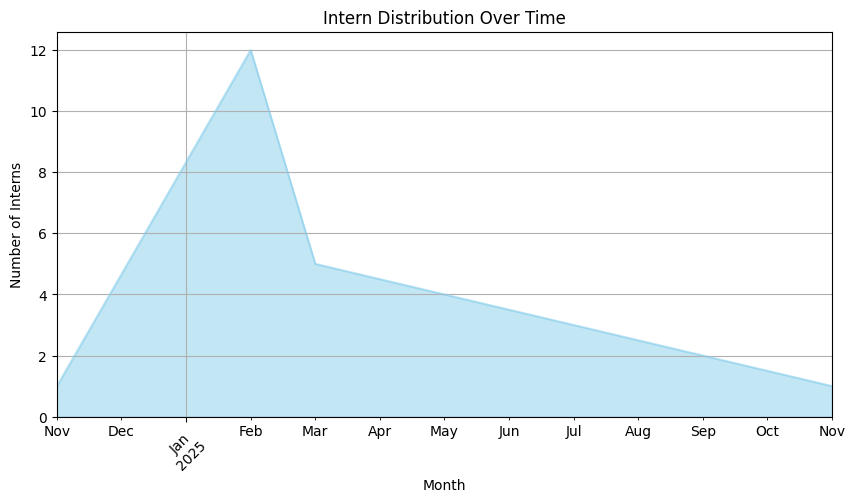

In [ ]:
intern_distribution = df1.groupby(df1["Start Date"].dt.to_period("M")).size()
plt.figure(figsize=(10, 5))
intern_distribution.plot(kind='area', alpha=0.5, color='skyblue')
plt.title("Intern Distribution Over Time")
plt.xlabel("Month")
plt.ylabel("Number of Interns")
plt.xticks(rotation=45)
plt.grid()
plt.show()

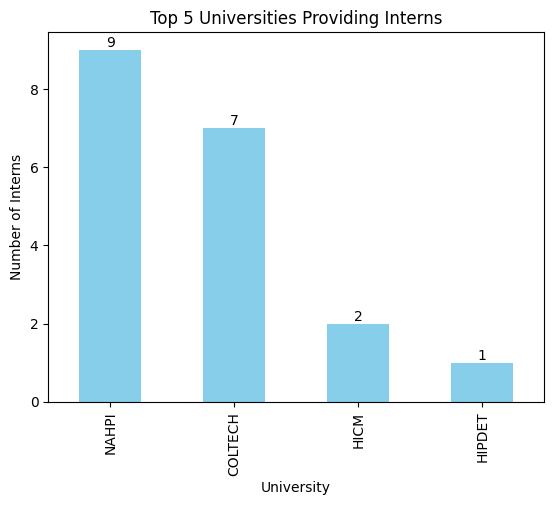

In [ ]:
# Top 5 universities providing interns
top_universities = df1["School"].value_counts().head(5)
bars = top_universities.plot(kind="bar", color="skyblue")
# Add value labels on top of the bars
for bar in bars.patches:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height,
             int(height), ha='center', va='bottom')
plt.title("Top 5 Universities Providing Interns")
plt.xlabel("University")
plt.ylabel("Number of Interns")
plt.show()

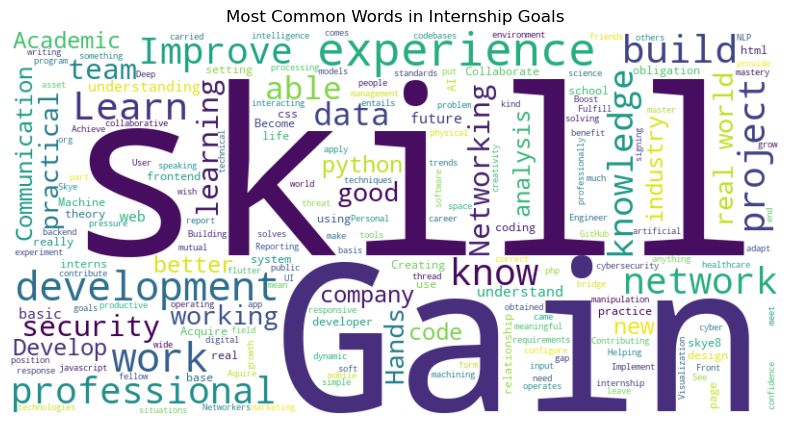

In [53]:
# Word Cloud for Internship Goals
text = " ".join(str(goal) for goal in df1["Internship Goals"].dropna())
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
plt.figure(figsize=(10,5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("Most Common Words in Internship Goals")
plt.show()

C:\Users\Dell\AppData\Local\Temp\ipykernel_28088\736277612.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df1["Stack"], y=df1["Internship_Duration"], palette="coolwarm")


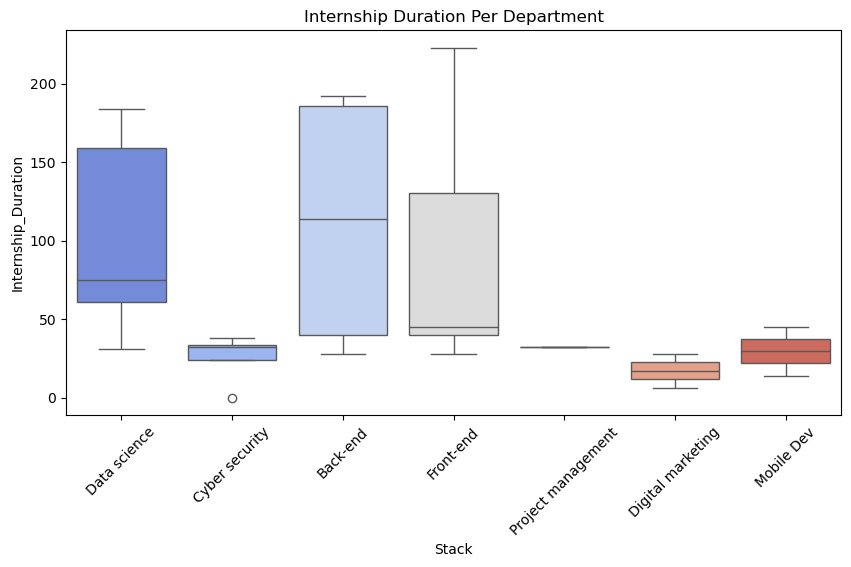

In [54]:
# Internship duration per department (boxplot)
plt.figure(figsize=(10,5))
sns.boxplot(x=df1["Stack"], y=df1["Internship_Duration"], palette="coolwarm")
plt.title("Internship Duration Per Department")
plt.xticks(rotation=45)
plt.show()

In [ ]:

# Prevent KMeans memory leak on Windows
os.environ["OMP_NUM_THREADS"] = "1"

# Sample DataFrame
df1 = pd.DataFrame({"Internship Goals": ["Data Science", "Web Development", "AI", "Data Science", "Web Development"]})

# Clustering interns based on skills and goals
vectorizer = LabelEncoder()
df1["Encoded_Goals"] = vectorizer.fit_transform(df1["Internship Goals"].astype(str))

scaler = StandardScaler()
kmeans_data = scaler.fit_transform(df1[["Encoded_Goals"]])

kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)  # Adding 'n_init' explicitly to avoid warnings
df1["Cluster"] = kmeans.fit_predict(kmeans_data)

print("Cluster Analysis Done!")
print(df1)


NameError: name 'os' is not defined

FileNotFoundError: [Errno 2] No such file or directory: 'new_File1.csv'

,Age,Gender,School,Start Date,End Date,Internship Goals,School d'pt,Stack,Highest Level of Education Completed
0,22,Male,NAHPI,2025-03-01,2025-08-30,Fulfill academic requirements \nImprove skills...,COMPUTER ENGINEERING,Data science,ADVANCED LEVEL
1,19,Male,COLTECH,2025-02-18,2025-03-22,1: gain practical experience in network securi...,COMPUTER ENGINEERING,Cyber security,ADVANCED LEVEL
2,21,Male,NAHPI,2025-03-19,2025-09-19,Gain development skill\nnetworking\ngain pract...,COMPUTER ENGINEERING,Back-end,ADVANCED LEVEL
3,19,Male,COLTECH,2025-02-18,2025-02-18,These are some of my goals for the internship ...,COMPUTER ENGINEERING,Cyber security,ADVANCED LEVEL
4,20,Male,COLTECH,2025-02-21,2025-03-22,"1. Learning the basics on html, css and javasc...",COMPUTER ENGINEERING,Front-end,ADVANCED LEVEL
5,20,Male,NAHPI,2025-02-18,2025-08-29,- To build my software development skills\n- T...,COMPUTER ENGINEERING,Back-end,ADVANCED LEVEL
6,20,Male,COLTECH,2025-02-12,2025-03-31,-get better at coding \n-be so good that I can...,COMPUTER ENGINEERING,Front-end,ADVANCED LEVEL
7,19,Female,COLTECH,2025-02-18,2025-03-31,User did not input anything,COMPUTER ENGINEERING,Front-end,ADVANCED LEVEL
8,22,Female,NAHPI,2025-03-18,2025-05-18,To know how to program using python \nTo do ma...,BIOMEDICAL ENGINEERING,Data science,ADVANCED LEVEL
9,21,Female,NAHPI,2025-02-18,2025-05-18,Learn how to code in Python\nAcquire skills in...,BIOMEDICAL ENGINEERING,Data science,ADVANCED LEVEL


,abt_skye8,why_skye8,is_first_time_at_skye8,department,Intern_rating,Alligiment_of_task_with_school,why,Gained_skils,Sufficiency_of_resources,How approachable and supportive are the supervisors?,...,Description_of_working_environment,how_inclusive_you_fet_into_the_team,valued_as_intern,was_encouraged_to_share_ideas,challenges_faced,how_skye8_cam_improve_intern_satisfaction,how_satified_are_interns,will_recomend_internship_to_others,would_like_to_work_at_skye8,"Any additional comments or feedback? \n(Open-ended, you can share anything else you feel is important)"
0,Friends/Family,I actually did internship in year1 at skye8 so...,No,Back-end,Good,Yes,The task provided actually help us practicaliz...,I'm still starting internship.,Yes,Good,...,"The work environment is friendly, good, intera...",4,3,Yes,I'm still starting out the internship.,Creation of outdoor activities per time.,7,Yes,Yes,User did not input anything
1,Social Media,Because I heard of their innovative dreams of ...,Yes,Front-end,Good,Yes,Because all the tasks given align to the front...,As a newbie in the front end development strea...,Yes,Satisfactory,...,Learning focused,4,4,Yes,Unclear expectations,User did not input anything,8,Yes,Yes,User did not input anything
2,Friends/Family,because they separate interns into different s...,No,Front-end,Good,Yes,"the tasks we get concern only our department, ...",how to work with teams and manage work files,Yes,Good,...,"Friendly, stressful, fun, learning-focused",4,3,Yes,Mostly the time for task completion was not th...,"actually, I think they are doing a great job, ...",8,Yes,Yes,nope noting in mind
3,Friends/Family,Mainly because it's closest to my home and als...,Yes,Back-end,Very good,Yes,My academic goal is to acquire enough skills a...,Backend development -- very productive\nMy cri...,Yes,Very good,...,"Friendly, learning-focused, professional and fun",5,4,Yes,poor communication amongst interns,Better communication overall,9,Yes,Yes,Nothing else
4,Friends/Family,Because it was the best choice I had,No,Front-end,Good,Yes,I have learnt a lot,"I have gain knowledge in HTML,CSS, and JavaScript",Yes,Good,...,"stressful ,friendly",3,3,Maybe,"high work load, unclear expectation",More structured training (possibly an outline ...,5,Maybe,Maybe,User did not input anything
5,Friends/Family,I choose Skye8 because it have a good reputati...,Yes,Data science,Very good,Yes,Because they task given were concern with my f...,Learn professional basics,Yes,Very good,...,Friendly,5,5,Yes,Unclear expectations,Should make interaction with more people outsi...,8,Yes,Yes,Some days apart from Saturday \nStudents can w...
6,Friends/Family,I choosed skye8 because I got very positive re...,Yes,Front-end,Satisfactory,Yes,The projects assigned to me where quite challe...,"I have enhanced my skills on html, css and js",Yes,Good,...,The work environment at skye8 is very friendly...,4,1,Yes,The only challenge I face at skye8 is the subm...,I think skye8 can improve on task time schedul...,6,Yes,Yes,User did not input anything
7,Friends/Family,Because it help to build the future,Yes,Front-end,Good,Yes,because it been a help to me,i have gain alot all thanks to my supervisor,Yes,Good,...,Friendly,5,1,Yes,Faced alot with the JavaScript,More structured training,10,Yes,Yes,I will love to come to Skye8 because it very g...
8,Social Media,Because I believe that I can gain the skills I...,No,Front-end,Good,Yes,The task assigned to me where quite challengin...,I have gain a lot but not yet applicable,Yes,Satisfactory,...,Learning-focused,3,3,Maybe,Poor communication,More structured training,5,Yes,Yes,User did not input anything
9,Friends/Family,Because it was the best choice i had,No,Front-end,Good,Yes,I have managed to learn a lot so far,"I have gained knowledge in HTML,CSS and JavaS...",Yes,Good,...,"stressful, friendly",3,3,Maybe,High workload\nUnclear expectations\nMental ex...,Make a course outline of what the interns are ...,5,Maybe,Maybe,User did not

<ipython-input-6-08e22d377c51>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=dept_counts.index, y=dept_counts.values, palette="coolwarm")


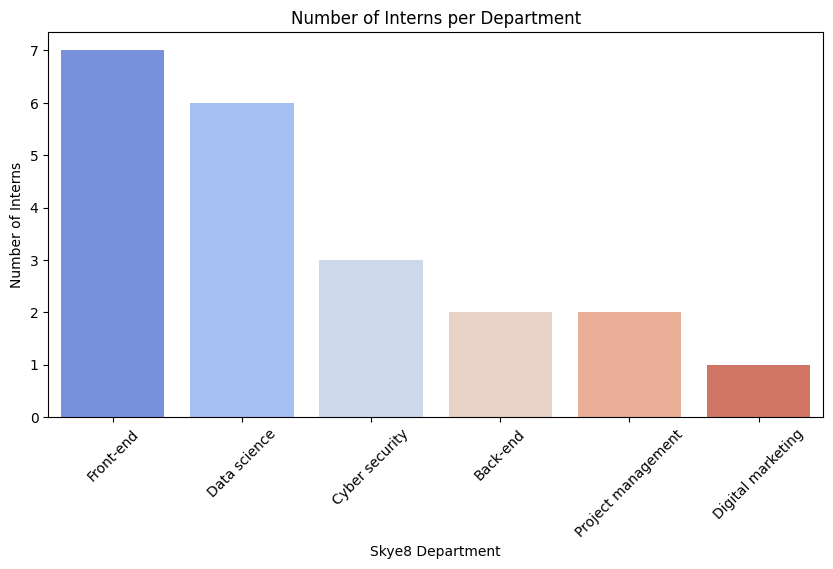

School  COLTECH  HICM  HIPDET  NAHPI
Gender                              
Female        1     1       1      4
Male          6     1       0      5


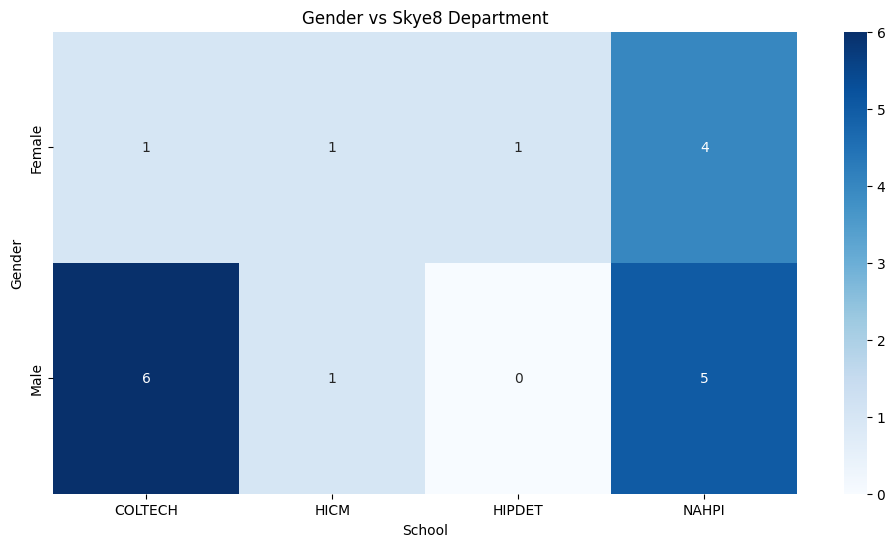

   Start Date  Intern_Count
0  2024-11-19             1
1  2025-02-12             1
2  2025-02-18             6
3  2025-02-19             1
4  2025-02-20             1
5  2025-02-21             1
6  2025-02-25             2
7  2025-03-01             2
8  2025-03-18             1
9  2025-03-19             2
10 2025-11-03             1
     End Date  Intern_Count
0  2025-02-18             1
1  2025-03-22             3
2  2025-03-28             1
3  2025-03-29             2
4  2025-03-31             2
5  2025-05-01             1
6  2025-05-18             2
7  2025-08-29             1
8  2025-08-30             1
9  2025-09-19             2
10 2025-09-20             1
11 2025-09-30             1
12 2025-11-09             1


<ipython-input-9-459b74cb7bdc>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
<ipython-input-9-459b74cb7bdc>:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


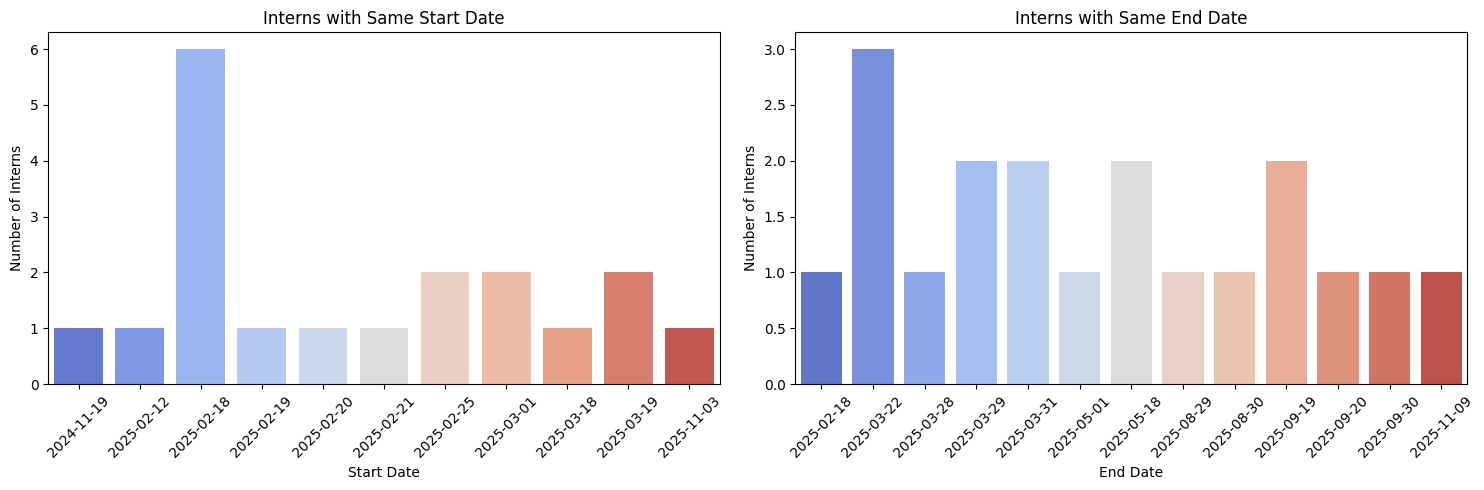

,Age
department,
Back-end,20.500000
Cyber security,21.333333
Data science,20.000000
Front-end,20.285714
Project management,20.000000


<ipython-input-11-b842c14e820f>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot( x= dept_mean.index, y=dept_mean.values, palette="coolwarm")


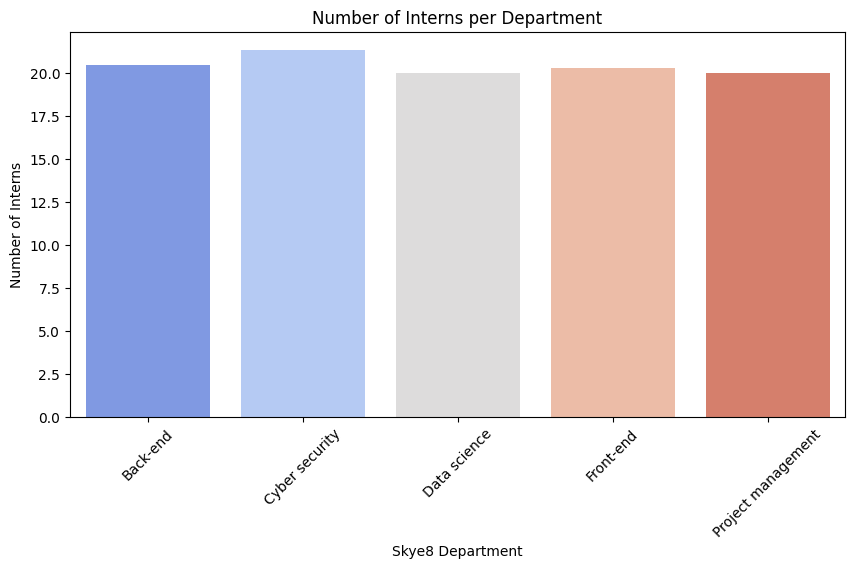

,Age
department,
Back-end,20.500000
Cyber security,21.333333
Data science,20.000000
Front-end,20.285714
Project management,20.000000


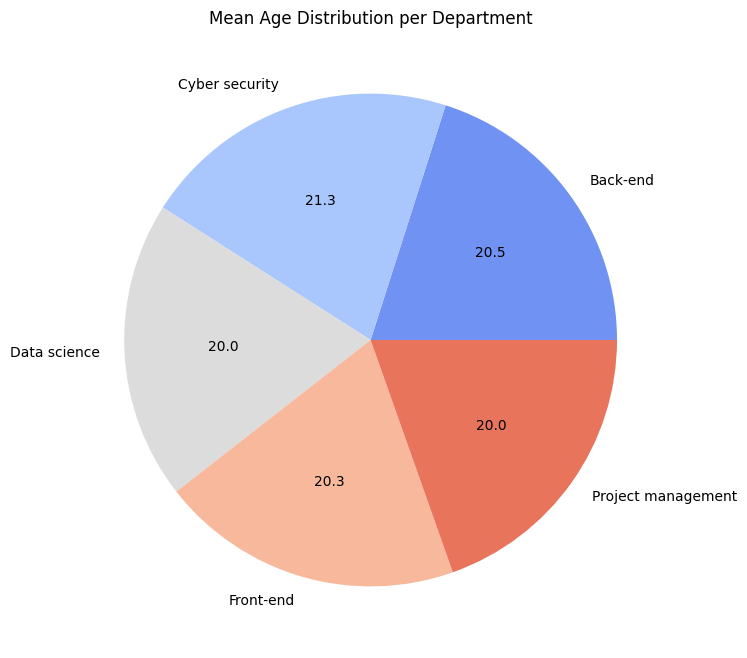

,Internship_Duration
School,
HICM,19.000000
COLTECH,30.285714
HIPDET,130.000000
NAHPI,154.222222


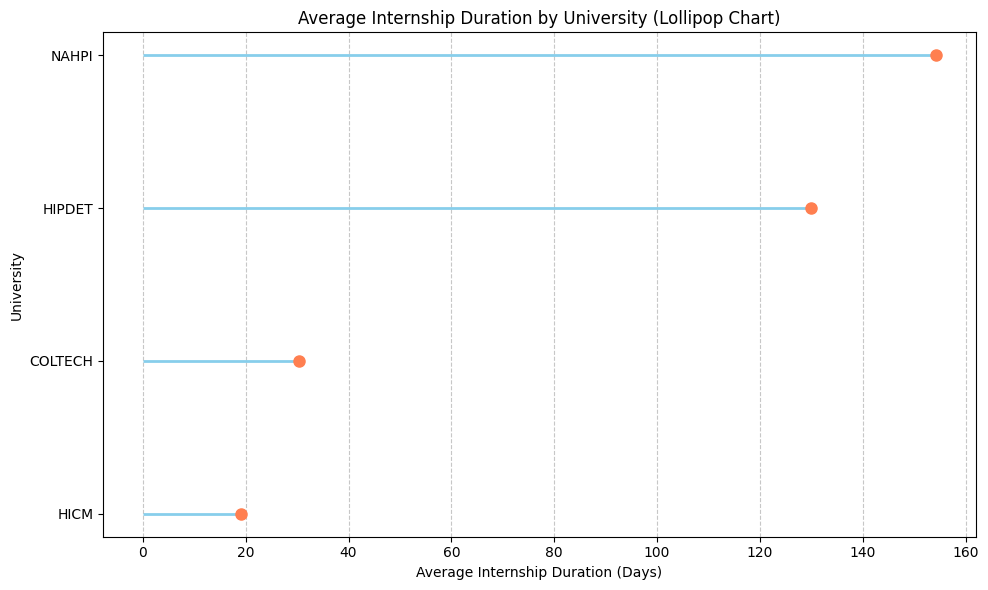

NameError: name 'data' is not defined

,Age,Gender,School,Start Date,End Date,Internship Goals,School d'pt,Stack,Highest Level of Education Completed,Internship_Duration
0,22,Male,NAHPI,2025-03-01,2025-08-30,Fulfill academic requirements \nImprove skills...,COMPUTER ENGINEERING,Data science,ADVANCED LEVEL,182
1,19,Male,COLTECH,2025-02-18,2025-03-22,1: gain practical experience in network securi...,COMPUTER ENGINEERING,Cyber security,ADVANCED LEVEL,32
2,21,Male,NAHPI,2025-03-19,2025-09-19,Gain development skill\nnetworking\ngain pract...,COMPUTER ENGINEERING,Back-end,ADVANCED LEVEL,184
3,19,Male,COLTECH,2025-02-18,2025-02-18,These are some of my goals for the internship ...,COMPUTER ENGINEERING,Cyber security,ADVANCED LEVEL,0
4,20,Male,COLTECH,2025-02-21,2025-03-22,"1. Learning the basics on html, css and javasc...",COMPUTER ENGINEERING,Front-end,ADVANCED LEVEL,29
5,20,Male,NAHPI,2025-02-18,2025-08-29,- To build my software development skills\n- T...,COMPUTER ENGINEERING,Back-end,ADVANCED LEVEL,192
6,20,Male,COLTECH,2025-02-12,2025-03-31,-get better at coding \n-be so good that I can...,COMPUTER ENGINEERING,Front-end,ADVANCED LEVEL,47
7,19,Female,COLTECH,2025-02-18,2025-03-31,User did not input anything,COMPUTER ENGINEERING,Front-end,ADVANCED LEVEL,41
8,22,Female,NAHPI,2025-03-18,2025-05-18,To know how to program using python \nTo do ma...,BIOMEDICAL ENGINEERING,Data science,ADVANCED LEVEL,61
9,21,Female,NAHPI,2025-02-18,2025-05-18,Learn how to code in Python\nAcquire skills in...,BIOMEDICAL ENGINEERING,Data science,ADVANCED LEVEL,89


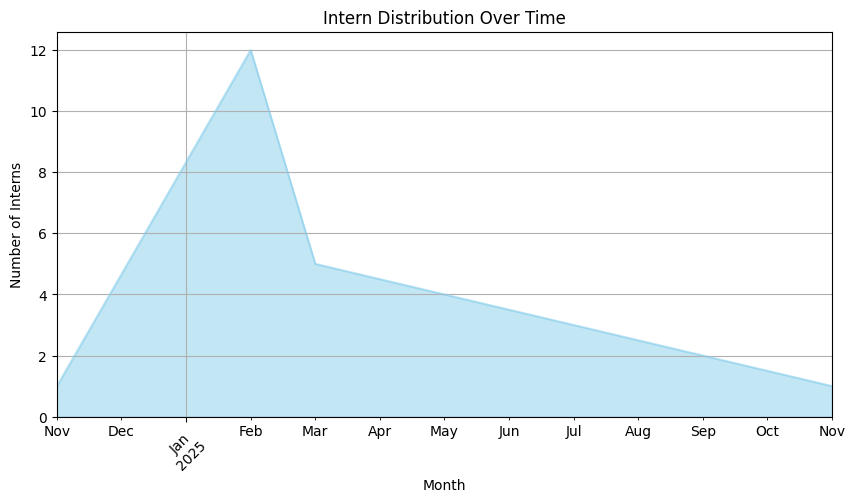

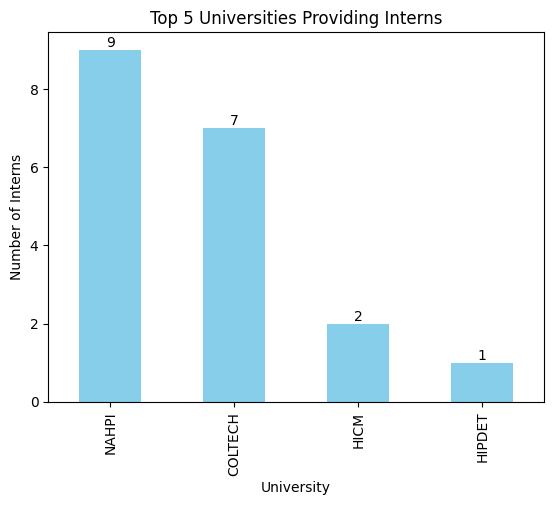

NameError: name 'df1' is not defined

<ipython-input-52-b5e1ed5f668d>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df1["Stack"], y=df1["Internship_Duration"], palette="coolwarm")


<Figure size 1000x500 with 0 Axes>

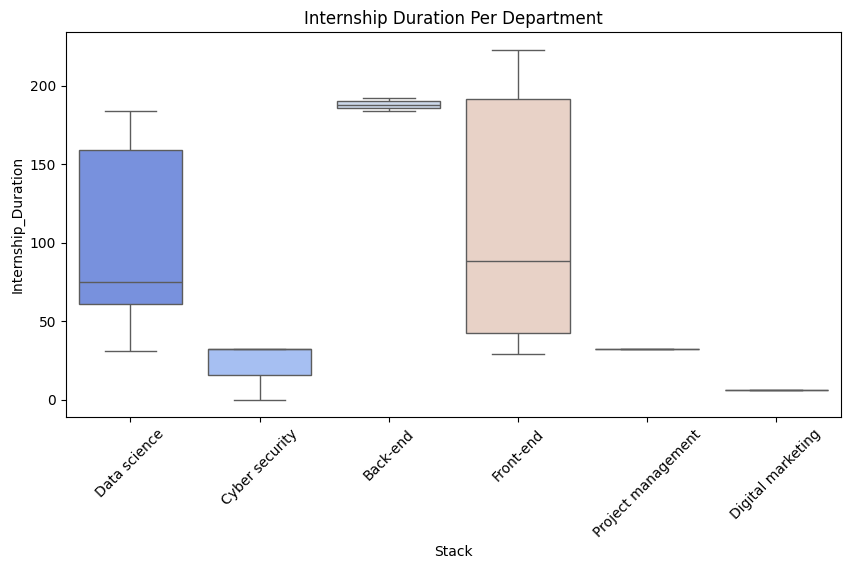

Cluster Analysis Done!


2025-03-21 14:12:25.435 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-03-21 14:12:25.436 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-03-21 14:12:25.439 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-03-21 14:12:25.440 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-03-21 14:12:25.527 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-03-21 14:12:25.528 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-03-21 14:12:25.529 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-03-21 14:12:25.532 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bar

KeyError: "None of [Index(['Encoded_Goals'], dtype='object')] are in the [columns]"

Longest Internship:
   Start Date   End Date  Internship_Duration  School      Stack
15 2025-02-19 2025-09-30                  223  NAHPI   Front-end

Shortest Internship:
  Start Date   End Date  Internship_Duration   School           Stack
3 2025-02-18 2025-02-18                    0  COLTECH  Cyber security


ValueError: shape mismatch: objects cannot be broadcast to a single shape.  Mismatch is between arg 0 with shape (2,) and arg 1 with shape (2, 1, 10).

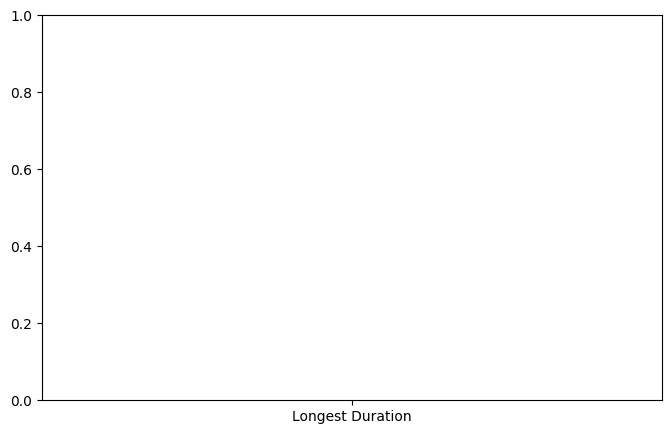

,Age,Gender,School,Start Date,End Date,Internship Goals,School d'pt,Stack,Highest Level of Education Completed
0,22,Male,NAHPI,2025-03-01,2025-08-30,Fulfill academic requirements \nImprove skills...,COMPUTER ENGINEERING,Data science,ADVANCED LEVEL
1,19,Male,COLTECH,2025-02-18,2025-03-22,1: gain practical experience in network securi...,COMPUTER ENGINEERING,Cyber security,ADVANCED LEVEL
2,21,Male,NAHPI,2025-03-19,2025-09-19,Gain development skill\nnetworking\ngain pract...,COMPUTER ENGINEERING,Back-end,ADVANCED LEVEL
3,19,Male,COLTECH,2025-02-18,2025-02-18,These are some of my goals for the internship ...,COMPUTER ENGINEERING,Cyber security,ADVANCED LEVEL
4,20,Male,COLTECH,2025-02-21,2025-03-22,"1. Learning the basics on html, css and javasc...",COMPUTER ENGINEERING,Front-end,ADVANCED LEVEL
5,20,Male,NAHPI,2025-02-18,2025-08-29,- To build my software development skills\n- T...,COMPUTER ENGINEERING,Back-end,ADVANCED LEVEL
6,20,Male,COLTECH,2025-02-12,2025-03-31,-get better at coding \n-be so good that I can...,COMPUTER ENGINEERING,Front-end,ADVANCED LEVEL
7,19,Female,COLTECH,2025-02-18,2025-03-31,User did not input anything,COMPUTER ENGINEERING,Front-end,ADVANCED LEVEL
8,22,Female,NAHPI,2025-03-18,2025-05-18,To know how to program using python \nTo do ma...,BIOMEDICAL ENGINEERING,Data science,ADVANCED LEVEL
9,21,Female,NAHPI,2025-02-18,2025-05-18,Learn how to code in Python\nAcquire skills in...,BIOMEDICAL ENGINEERING,Data science,ADVANCED LEVEL


,abt_skye8,why_skye8,is_first_time_at_skye8,department,Intern_rating,Alligiment_of_task_with_school,why,Gained_skils,Sufficiency_of_resources,How approachable and supportive are the supervisors?,...,Description_of_working_environment,how_inclusive_you_fet_into_the_team,valued_as_intern,was_encouraged_to_share_ideas,challenges_faced,how_skye8_cam_improve_intern_satisfaction,how_satified_are_interns,will_recomend_internship_to_others,would_like_to_work_at_skye8,"Any additional comments or feedback? \n(Open-ended, you can share anything else you feel is important)"
0,Friends/Family,I actually did internship in year1 at skye8 so...,No,Back-end,Good,Yes,The task provided actually help us practicaliz...,I'm still starting internship.,Yes,Good,...,"The work environment is friendly, good, intera...",4,3,Yes,I'm still starting out the internship.,Creation of outdoor activities per time.,7,Yes,Yes,User did not input anything
1,Social Media,Because I heard of their innovative dreams of ...,Yes,Front-end,Good,Yes,Because all the tasks given align to the front...,As a newbie in the front end development strea...,Yes,Satisfactory,...,Learning focused,4,4,Yes,Unclear expectations,User did not input anything,8,Yes,Yes,User did not input anything
2,Friends/Family,because they separate interns into different s...,No,Front-end,Good,Yes,"the tasks we get concern only our department, ...",how to work with teams and manage work files,Yes,Good,...,"Friendly, stressful, fun, learning-focused",4,3,Yes,Mostly the time for task completion was not th...,"actually, I think they are doing a great job, ...",8,Yes,Yes,nope noting in mind
3,Friends/Family,Mainly because it's closest to my home and als...,Yes,Back-end,Very good,Yes,My academic goal is to acquire enough skills a...,Backend development -- very productive\nMy cri...,Yes,Very good,...,"Friendly, learning-focused, professional and fun",5,4,Yes,poor communication amongst interns,Better communication overall,9,Yes,Yes,Nothing else
4,Friends/Family,Because it was the best choice I had,No,Front-end,Good,Yes,I have learnt a lot,"I have gain knowledge in HTML,CSS, and JavaScript",Yes,Good,...,"stressful ,friendly",3,3,Maybe,"high work load, unclear expectation",More structured training (possibly an outline ...,5,Maybe,Maybe,User did not input anything
5,Friends/Family,I choose Skye8 because it have a good reputati...,Yes,Data science,Very good,Yes,Because they task given were concern with my f...,Learn professional basics,Yes,Very good,...,Friendly,5,5,Yes,Unclear expectations,Should make interaction with more people outsi...,8,Yes,Yes,Some days apart from Saturday \nStudents can w...
6,Friends/Family,I choosed skye8 because I got very positive re...,Yes,Front-end,Satisfactory,Yes,The projects assigned to me where quite challe...,"I have enhanced my skills on html, css and js",Yes,Good,...,The work environment at skye8 is very friendly...,4,1,Yes,The only challenge I face at skye8 is the subm...,I think skye8 can improve on task time schedul...,6,Yes,Yes,User did not input anything
7,Friends/Family,Because it help to build the future,Yes,Front-end,Good,Yes,because it been a help to me,i have gain alot all thanks to my supervisor,Yes,Good,...,Friendly,5,1,Yes,Faced alot with the JavaScript,More structured training,10,Yes,Yes,I will love to come to Skye8 because it very g...
8,Social Media,Because I believe that I can gain the skills I...,No,Front-end,Good,Yes,The task assigned to me where quite challengin...,I have gain a lot but not yet applicable,Yes,Satisfactory,...,Learning-focused,3,3,Maybe,Poor communication,More structured training,5,Yes,Yes,User did not input anything
9,Friends/Family,Because it was the best choice i had,No,Front-end,Good,Yes,I have managed to learn a lot so far,"I have gained knowledge in HTML,CSS and JavaS...",Yes,Good,...,"stressful, friendly",3,3,Maybe,High workload\nUnclear expectations\nMental ex...,Make a course outline of what the interns are ...,5,Maybe,Maybe,User did not

In [59]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from wordcloud import WordCloud
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score 
import os

In [ ]:
df1 = pd.read_csv('new_File1.csv')
df2 = pd.read_csv('new_File2.csv')

FileNotFoundError: [Errno 2] No such file or directory: 'new_File1.csv'

In [ ]:
df1

,Age,Gender,School,Start Date,End Date,Internship Goals,School d'pt,Stack,Highest Level of Education Completed
0,22,Male,NAHPI,2025-03-01,2025-08-30,Fulfill academic requirements \nImprove skills...,COMPUTER ENGINEERING,Data science,ADVANCED LEVEL
1,19,Male,COLTECH,2025-02-18,2025-03-22,1: gain practical experience in network securi...,COMPUTER ENGINEERING,Cyber security,ADVANCED LEVEL
2,21,Male,NAHPI,2025-03-19,2025-09-19,Gain development skill\nnetworking\ngain pract...,COMPUTER ENGINEERING,Back-end,ADVANCED LEVEL
3,19,Male,COLTECH,2025-02-18,2025-02-18,These are some of my goals for the internship ...,COMPUTER ENGINEERING,Cyber security,ADVANCED LEVEL
4,20,Male,COLTECH,2025-02-21,2025-03-22,"1. Learning the basics on html, css and javasc...",COMPUTER ENGINEERING,Front-end,ADVANCED LEVEL
5,20,Male,NAHPI,2025-02-18,2025-08-29,- To build my software development skills\n- T...,COMPUTER ENGINEERING,Back-end,ADVANCED LEVEL
6,20,Male,COLTECH,2025-02-12,2025-03-31,-get better at coding \n-be so good that I can...,COMPUTER ENGINEERING,Front-end,ADVANCED LEVEL
7,19,Female,COLTECH,2025-02-18,2025-03-31,User did not input anything,COMPUTER ENGINEERING,Front-end,ADVANCED LEVEL
8,22,Female,NAHPI,2025-03-18,2025-05-18,To know how to program using python \nTo do ma...,BIOMEDICAL ENGINEERING,Data science,ADVANCED LEVEL
9,21,Female,NAHPI,2025-02-18,2025-05-18,Learn how to code in Python\nAcquire skills in...,BIOMEDICAL ENGINEERING,Data science,ADVANCED LEVEL


In [ ]:
df2

,abt_skye8,why_skye8,is_first_time_at_skye8,department,Intern_rating,Alligiment_of_task_with_school,why,Gained_skils,Sufficiency_of_resources,How approachable and supportive are the supervisors?,...,Description_of_working_environment,how_inclusive_you_fet_into_the_team,valued_as_intern,was_encouraged_to_share_ideas,challenges_faced,how_skye8_cam_improve_intern_satisfaction,how_satified_are_interns,will_recomend_internship_to_others,would_like_to_work_at_skye8,"Any additional comments or feedback? \n(Open-ended, you can share anything else you feel is important)"
0,Friends/Family,I actually did internship in year1 at skye8 so...,No,Back-end,Good,Yes,The task provided actually help us practicaliz...,I'm still starting internship.,Yes,Good,...,"The work environment is friendly, good, intera...",4,3,Yes,I'm still starting out the internship.,Creation of outdoor activities per time.,7,Yes,Yes,User did not input anything
1,Social Media,Because I heard of their innovative dreams of ...,Yes,Front-end,Good,Yes,Because all the tasks given align to the front...,As a newbie in the front end development strea...,Yes,Satisfactory,...,Learning focused,4,4,Yes,Unclear expectations,User did not input anything,8,Yes,Yes,User did not input anything
2,Friends/Family,because they separate interns into different s...,No,Front-end,Good,Yes,"the tasks we get concern only our department, ...",how to work with teams and manage work files,Yes,Good,...,"Friendly, stressful, fun, learning-focused",4,3,Yes,Mostly the time for task completion was not th...,"actually, I think they are doing a great job, ...",8,Yes,Yes,nope noting in mind
3,Friends/Family,Mainly because it's closest to my home and als...,Yes,Back-end,Very good,Yes,My academic goal is to acquire enough skills a...,Backend development -- very productive\nMy cri...,Yes,Very good,...,"Friendly, learning-focused, professional and fun",5,4,Yes,poor communication amongst interns,Better communication overall,9,Yes,Yes,Nothing else
4,Friends/Family,Because it was the best choice I had,No,Front-end,Good,Yes,I have learnt a lot,"I have gain knowledge in HTML,CSS, and JavaScript",Yes,Good,...,"stressful ,friendly",3,3,Maybe,"high work load, unclear expectation",More structured training (possibly an outline ...,5,Maybe,Maybe,User did not input anything
5,Friends/Family,I choose Skye8 because it have a good reputati...,Yes,Data science,Very good,Yes,Because they task given were concern with my f...,Learn professional basics,Yes,Very good,...,Friendly,5,5,Yes,Unclear expectations,Should make interaction with more people outsi...,8,Yes,Yes,Some days apart from Saturday \nStudents can w...
6,Friends/Family,I choosed skye8 because I got very positive re...,Yes,Front-end,Satisfactory,Yes,The projects assigned to me where quite challe...,"I have enhanced my skills on html, css and js",Yes,Good,...,The work environment at skye8 is very friendly...,4,1,Yes,The only challenge I face at skye8 is the subm...,I think skye8 can improve on task time schedul...,6,Yes,Yes,User did not input anything
7,Friends/Family,Because it help to build the future,Yes,Front-end,Good,Yes,because it been a help to me,i have gain alot all thanks to my supervisor,Yes,Good,...,Friendly,5,1,Yes,Faced alot with the JavaScript,More structured training,10,Yes,Yes,I will love to come to Skye8 because it very g...
8,Social Media,Because I believe that I can gain the skills I...,No,Front-end,Good,Yes,The task assigned to me where quite challengin...,I have gain a lot but not yet applicable,Yes,Satisfactory,...,Learning-focused,3,3,Maybe,Poor communication,More structured training,5,Yes,Yes,User did not input anything
9,Friends/Family,Because it was the best choice i had,No,Front-end,Good,Yes,I have managed to learn a lot so far,"I have gained knowledge in HTML,CSS and JavaS...",Yes,Good,...,"stressful, friendly",3,3,Maybe,High workload\nUnclear expectations\nMental ex...,Make a course outline of what the interns are ...,5,Maybe,Maybe,User did not

<ipython-input-6-08e22d377c51>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=dept_counts.index, y=dept_counts.values, palette="coolwarm")


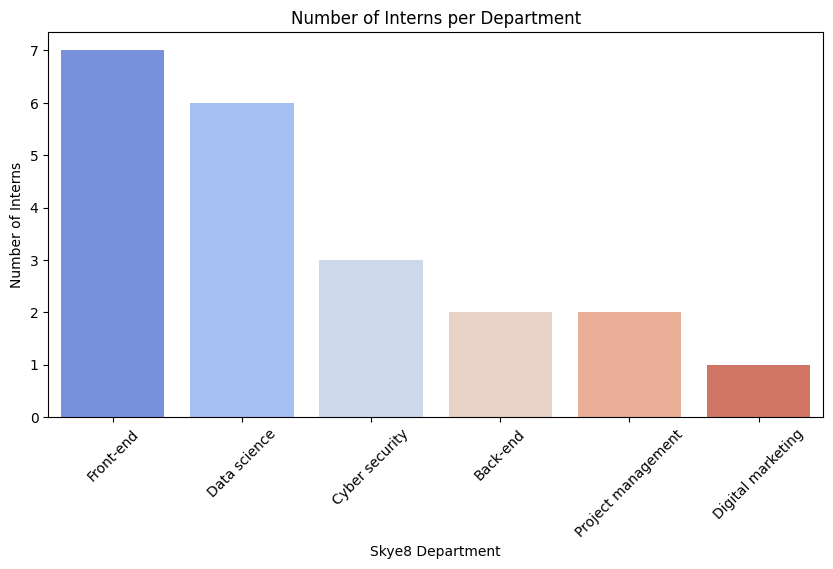

In [ ]:
# Count interns per department
dept_counts = df2["department"].value_counts()

# Plot bar chart
plt.figure(figsize=(10,5))
sns.barplot(x=dept_counts.index, y=dept_counts.values, palette="coolwarm")
plt.xticks(rotation=45)
plt.xlabel("Skye8 Department")
plt.ylabel("Number of Interns")
plt.title("Number of Interns per Department")
plt.show()


School  COLTECH  HICM  HIPDET  NAHPI
Gender                              
Female        1     1       1      4
Male          6     1       0      5


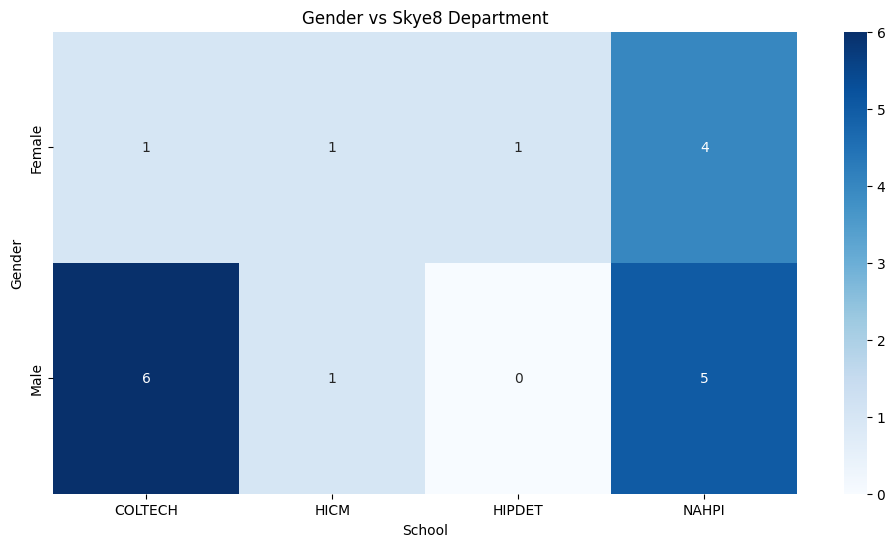

In [ ]:
dept_mapping = df2.groupby([df1["Gender"], df1["School"]]).size().unstack(fill_value=0)


print(dept_mapping.head())
plt.figure(figsize=(12, 6))
sns.heatmap(dept_mapping, cmap="Blues", annot=True, fmt="d")
plt.title("Gender vs Skye8 Department")
plt.show()


In [ ]:
# Convert Start_Date to datetime
df1["Start Date"] = pd.to_datetime(df1["Start Date"])

# Count interns per start date
start_counts = df1.groupby("Start Date").size().reset_index(name="Intern_Count")

# Filter where more than 1 intern started
same_start_dates = start_counts[start_counts["Intern_Count"] >= 1]
print(same_start_dates)




# Convert Start_Date to datetime
df1["End Date"] = pd.to_datetime(df1["End Date"])

# Count interns per start date
end_counts = df1.groupby("End Date").size().reset_index(name="Intern_Count")

# Filter where more than 1 intern Ended
same_end_dates = end_counts[end_counts["Intern_Count"] >= 1]
print(same_end_dates)


   Start Date  Intern_Count
0  2024-11-19             1
1  2025-02-12             1
2  2025-02-18             6
3  2025-02-19             1
4  2025-02-20             1
5  2025-02-21             1
6  2025-02-25             2
7  2025-03-01             2
8  2025-03-18             1
9  2025-03-19             2
10 2025-11-03             1
     End Date  Intern_Count
0  2025-02-18             1
1  2025-03-22             3
2  2025-03-28             1
3  2025-03-29             2
4  2025-03-31             2
5  2025-05-01             1
6  2025-05-18             2
7  2025-08-29             1
8  2025-08-30             1
9  2025-09-19             2
10 2025-09-20             1
11 2025-09-30             1
12 2025-11-09             1


<ipython-input-9-459b74cb7bdc>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
<ipython-input-9-459b74cb7bdc>:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


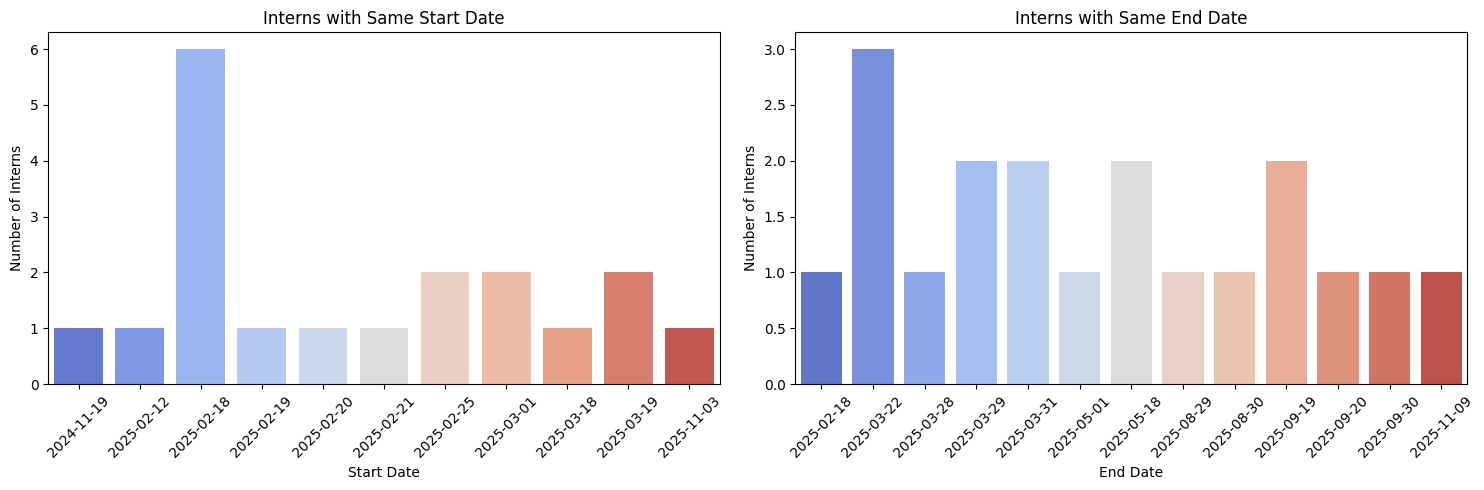

In [ ]:
# Create a figure with two subplots side by side
plt.figure(figsize=(15, 5))

# First subplot for Start Dates
plt.subplot(1, 2, 1)
sns.barplot(
    data=same_start_dates,
    x='Start Date',
    y='Intern_Count',
    palette="coolwarm"
)
plt.xticks(rotation=45)
plt.xlabel("Start Date")
plt.ylabel("Number of Interns")
plt.title("Interns with Same Start Date")

# Second subplot for End Dates
plt.subplot(1, 2, 2)
sns.barplot(
    data=same_end_dates,
    x='End Date',
    y='Intern_Count',
    palette="coolwarm"
)
plt.xticks(rotation=45)
plt.xlabel("End Date")
plt.ylabel("Number of Interns")
plt.title("Interns with Same End Date")

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()


In [ ]:
grp_dpt = df1['Age'].groupby(df2['department'])
dept_mean =grp_dpt.mean()
dept_mean



,Age
department,
Back-end,20.500000
Cyber security,21.333333
Data science,20.000000
Front-end,20.285714
Project management,20.000000


<ipython-input-11-b842c14e820f>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot( x= dept_mean.index, y=dept_mean.values, palette="coolwarm")


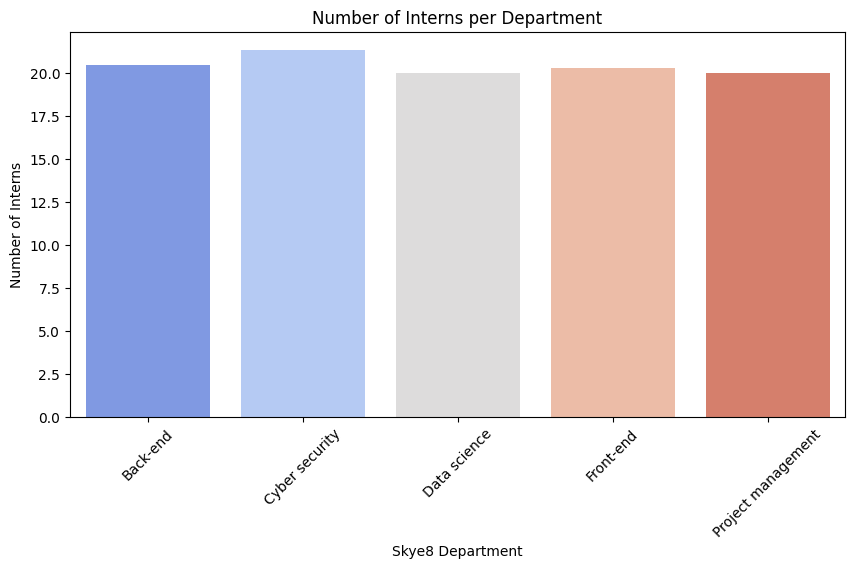

In [ ]:
plt.figure(figsize=(10,5))
sns.barplot( x= dept_mean.index, y=dept_mean.values, palette="coolwarm")
plt.xticks(rotation=45)
plt.xlabel("Skye8 Department")
plt.ylabel("Number of Interns")
plt.title("Number of Interns per Department")
plt.show()

In [ ]:
grp_dpt = df1['Age'].groupby(df2['department'])
dept_mean =grp_dpt.mean()
dept_mean



,Age
department,
Back-end,20.500000
Cyber security,21.333333
Data science,20.000000
Front-end,20.285714
Project management,20.000000


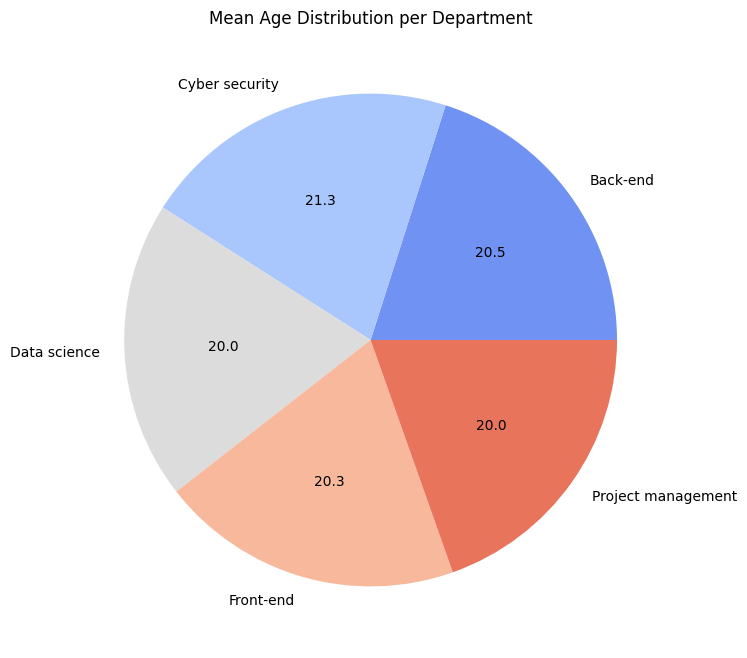

In [ ]:

plt.figure(figsize=(8, 8))
plt.pie(dept_mean.values, labels=dept_mean.index,
        autopct=lambda p: '{:.1f}'.format(p * sum(dept_mean.values) / 100),
        colors=sns.color_palette("coolwarm", len(dept_mean)))

plt.title("Mean Age Distribution per Department")

plt.show()

In [ ]:
university_duration = df1.groupby('School')['Internship_Duration'].mean().sort_values()
university_duration

,Internship_Duration
School,
HICM,19.000000
COLTECH,30.285714
HIPDET,130.000000
NAHPI,154.222222


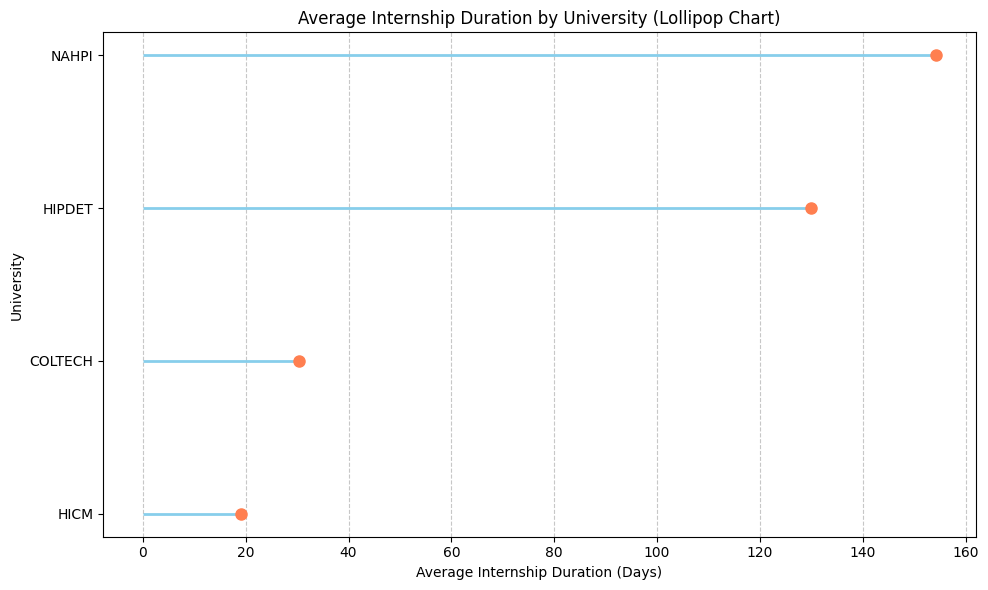

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.hlines(y=university_duration.index, xmin=0, xmax=university_duration.values, color='skyblue', linewidth=2)
plt.plot(university_duration.values, university_duration.index, "o", markersize=8, color='coral')
plt.xlabel("Average Internship Duration (Days)")
plt.ylabel("University")
plt.title("Average Internship Duration by University (Lollipop Chart)")
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [60]:
# Convert date columns
df1["Start Date"] = pd.to_datetime(df1["Start Date"], errors="coerce")
df1["End Date"] = pd.to_datetime(df1["End Date"], errors="coerce")

In [61]:
# Internship Duration
df1["Internship_Duration"] = (df1["End Date"] - df1["Start Date"]).dt.days
df1

,Age,Gender,School,Start Date,End Date,Internship Goals,School d'pt,Stack,Highest Level of Education Completed,Internship_Duration,Encoded_Goals,Cluster
0,22,Male,NAHPI,2025-03-01,2025-08-30,Fulfill academic requirements \nImprove skills...,COMPUTER ENGINEERING,Data science,ADVANCED LEVEL,182,16,2
1,19,Male,COLTECH,2025-02-18,2025-03-22,1: gain practical experience in network securi...,COMPUTER ENGINEERING,Cyber security,ADVANCED LEVEL,32,10,1
2,21,Male,NAHPI,2025-03-19,2025-09-19,Gain development skill\nnetworking\ngain pract...,COMPUTER ENGINEERING,Back-end,ADVANCED LEVEL,184,17,2
3,19,Male,COLTECH,2025-02-18,2025-02-18,These are some of my goals for the internship ...,COMPUTER ENGINEERING,Cyber security,ADVANCED LEVEL,0,23,0
4,20,Male,COLTECH,2025-02-21,2025-03-22,"1. Learning the basics on html, css and javasc...",COMPUTER ENGINEERING,Front-end,ADVANCED LEVEL,29,9,1
5,20,Male,NAHPI,2025-02-18,2025-08-29,- To build my software development skills\n- T...,COMPUTER ENGINEERING,Back-end,ADVANCED LEVEL,192,4,1
6,20,Male,COLTECH,2025-02-12,2025-03-31,-get better at coding \n-be so good that I can...,COMPUTER ENGINEERING,Front-end,ADVANCED LEVEL,47,7,1
7,19,Female,COLTECH,2025-02-18,2025-03-31,User did not input anything,COMPUTER ENGINEERING,Front-end,ADVANCED LEVEL,41,27,0
8,22,Female,NAHPI,2025-03-18,2025-05-18,To know how to program using python \nTo do ma...,BIOMEDICAL ENGINEERING,Data science,ADVANCED LEVEL,61,25,0
9,21,Female,NAHPI,2025-02-18,2025-05-18,Learn how to code in Python\nAcquire skills in...,BIOMEDICAL ENGINEERING,Data science,ADVANCED LEVEL,89,20,0


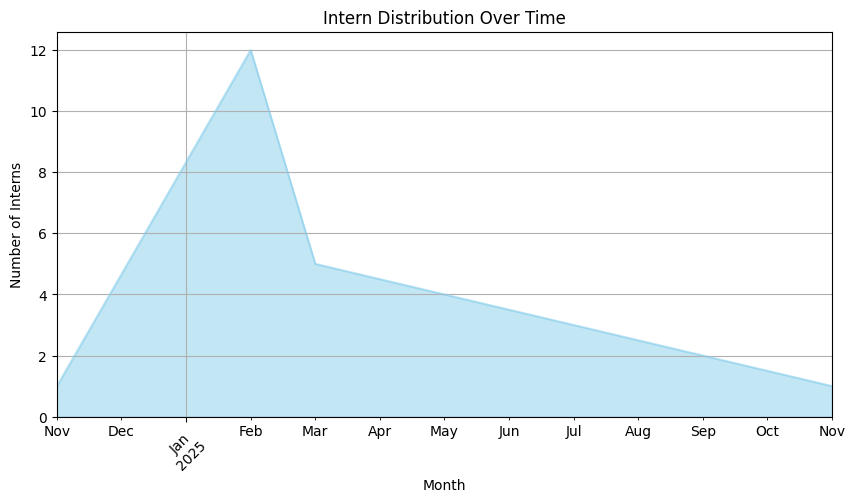

In [ ]:
intern_distribution = df1.groupby(df1["Start Date"].dt.to_period("M")).size()
plt.figure(figsize=(10, 5))
intern_distribution.plot(kind='area', alpha=0.5, color='skyblue')
plt.title("Intern Distribution Over Time")
plt.xlabel("Month")
plt.ylabel("Number of Interns")
plt.xticks(rotation=45)
plt.grid()
plt.show()

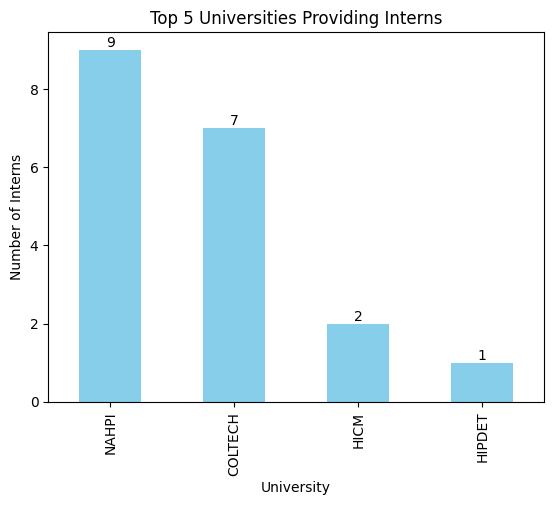

In [ ]:
# Top 5 universities providing interns
top_universities = df1["School"].value_counts().head(5)
bars = top_universities.plot(kind="bar", color="skyblue")
# Add value labels on top of the bars
for bar in bars.patches:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height,
             int(height), ha='center', va='bottom')
plt.title("Top 5 Universities Providing Interns")
plt.xlabel("University")
plt.ylabel("Number of Interns")
plt.show()

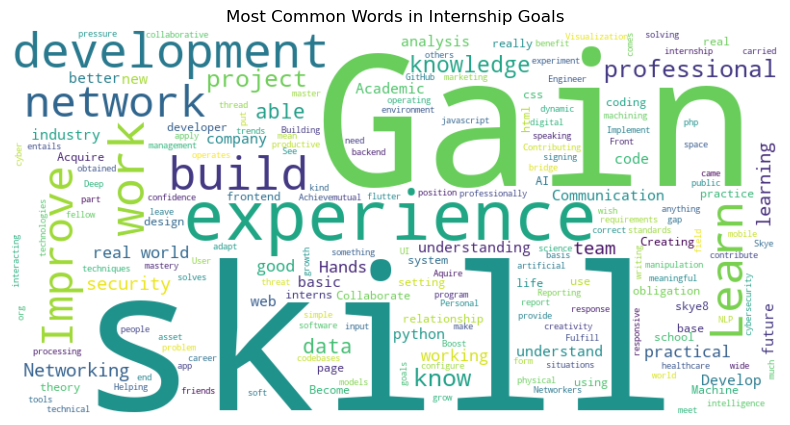

In [62]:
# Word Cloud for Internship Goals
text = " ".join(str(goal) for goal in df1["Internship Goals"].dropna())
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
plt.figure(figsize=(10,5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("Most Common Words in Internship Goals")
plt.show()

C:\Users\Dell\AppData\Local\Temp\ipykernel_28088\736277612.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df1["Stack"], y=df1["Internship_Duration"], palette="coolwarm")
c:\Users\Dell\anaconda3\Lib\site-packages\matplotlib\_api\__init__.py:125: RuntimeWarning: coroutine 'InteractiveShell.run_cell_async' was never awaited
  if val not in values:


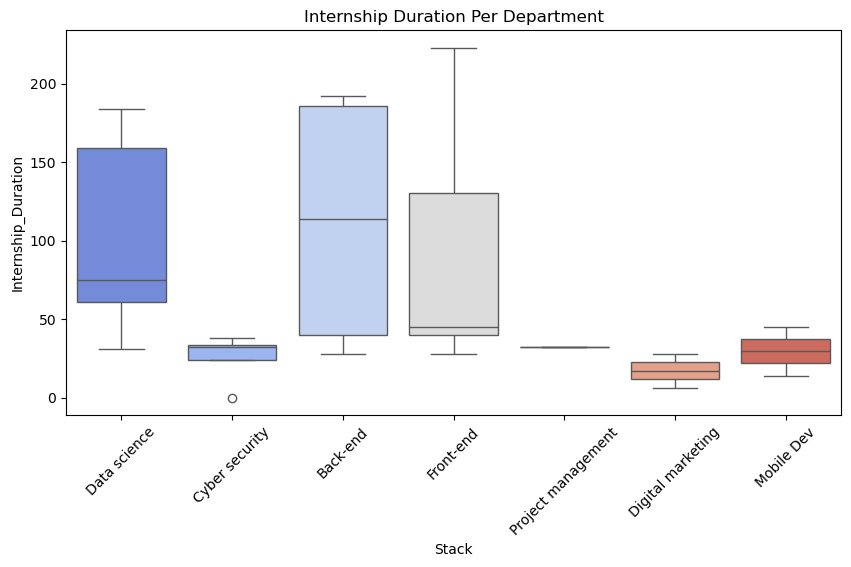

In [63]:
# Internship duration per department (boxplot)
plt.figure(figsize=(10,5))
sns.boxplot(x=df1["Stack"], y=df1["Internship_Duration"], palette="coolwarm")
plt.title("Internship Duration Per Department")
plt.xticks(rotation=45)
plt.show()

In [65]:


# Prevent KMeans memory leak on Windows
os.environ["OMP_NUM_THREADS"] = "1"

# Sample DataFrame
df1 = pd.DataFrame({"Internship Goals": ["Data Science", "Web Development", "AI", "Data Science", "Web Development"]})

# Clustering interns based on skills and goals
vectorizer = LabelEncoder()
df1["Encoded_Goals"] = vectorizer.fit_transform(df1["Internship Goals"].astype(str))

scaler = StandardScaler()
kmeans_data = scaler.fit_transform(df1[["Encoded_Goals"]])

kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)  # Adding 'n_init' explicitly to avoid warnings
df1["Cluster"] = kmeans.fit_predict(kmeans_data)

print("Cluster Analysis Done!")
print(df1)


c:\Users\Dell\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


Cluster Analysis Done!
  Internship Goals  Encoded_Goals  Cluster
0     Data Science              1        1
1  Web Development              2        0
2               AI              0        2
3     Data Science              1        1
4  Web Development              2        0


C:\Users\Dell\AppData\Local\Temp\ipykernel_28088\9602425.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=cluster_counts.index, y=cluster_counts.values, palette="viridis")


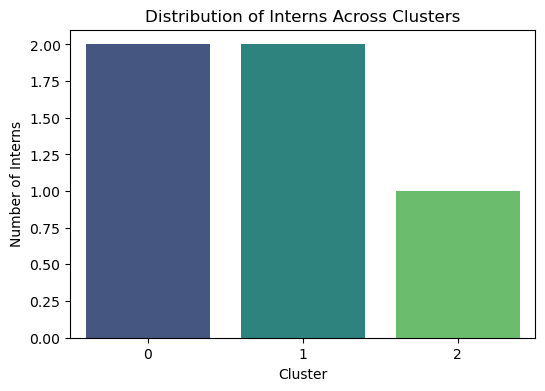

In [66]:
import matplotlib.pyplot as plt
import seaborn as sns

# Count number of interns in each cluster
cluster_counts = df1["Cluster"].value_counts()

# Plot bar chart
plt.figure(figsize=(6,4))
sns.barplot(x=cluster_counts.index, y=cluster_counts.values, palette="viridis")
plt.xlabel("Cluster")
plt.ylabel("Number of Interns")
plt.title("Distribution of Interns Across Clusters")
plt.show()


In [67]:
# Interactive Streamlit Dashboard
def run_dashboard():
    st.title("Internship Insights Dashboard")
    st.subheader("Intern Distribution Over Time")
    st.line_chart(df1.groupby(df1["Start Date"].dt.to_period("M")).size())

    st.subheader("Top 5 Universities Providing Interns")
    st.bar_chart(top_universities)

    st.subheader("Internship Duration Per Department")
    st.pyplot(sns.boxplot(x=df1["Stack"], y=df1["Internship_Duration"], palette="coolwarm").get_figure())

if __name__ == "__main__":
    run_dashboard()

NameError: name 'st' is not defined

In [70]:
# Predict department assignment using classification
X = df1[["Encoded_Goals"]]
y = df2["Stack"].astype(str)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = RandomForestClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print("Department Prediction Accuracy:", accuracy_score(y_test, y_pred))

KeyError: 'Stack'

In [72]:
# Find longest/shortest durations
longest = df1[df1['Internship_Duration'] == df1['Internship_Duration'].max()]
shortest = df1[df1['Internship_Duration'] == df1['Internship_Duration'].min()]

print("Longest Internship:")
print(longest[['Start Date', 'End Date', 'Internship_Duration', 'School', 'Stack']])
print("\nShortest Internship:")
print(shortest[['Start Date', 'End Date', 'Internship_Duration', 'School', 'Stack']])

KeyError: 'Internship_Duration'

In [73]:
durations = [longest, shortest]
labels = ['Longest Duration', 'Shortest Duration']
colors = ['skyblue', 'salmon']

# Create the bar chart
plt.figure(figsize=(8, 5))
plt.bar(labels, durations, color=colors)

# Add titles and labels
plt.title('Longest and Shortest Internship Durations')
plt.xlabel('Duration Type')
plt.ylabel('Duration (Days)')

# Add value labels on top of the bars
for i, value in enumerate(durations):
    plt.text(i, value + 5, str(value), ha='center')

# Show the plot
plt.show()

NameError: name 'longest' is not defined

<ipython-input-6-08e22d377c51>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=dept_counts.index, y=dept_counts.values, palette="coolwarm")


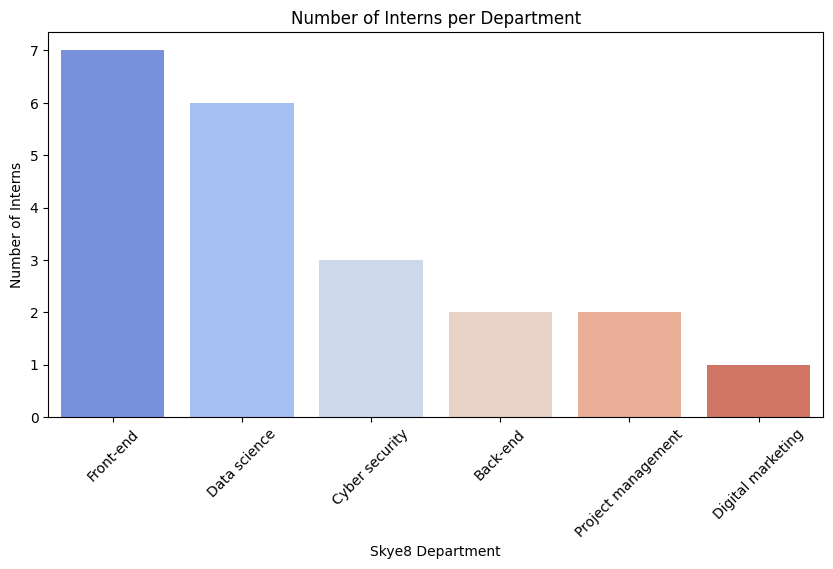

School  COLTECH  HICM  HIPDET  NAHPI
Gender                              
Female        1     1       1      4
Male          6     1       0      5


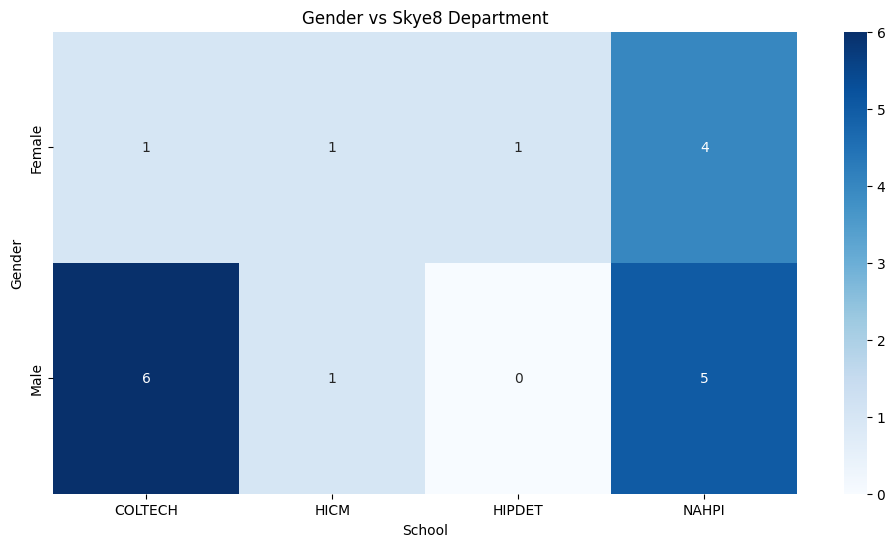

   Start Date  Intern_Count
0  2024-11-19             1
1  2025-02-12             1
2  2025-02-18             6
3  2025-02-19             1
4  2025-02-20             1
5  2025-02-21             1
6  2025-02-25             2
7  2025-03-01             2
8  2025-03-18             1
9  2025-03-19             2
10 2025-11-03             1
     End Date  Intern_Count
0  2025-02-18             1
1  2025-03-22             3
2  2025-03-28             1
3  2025-03-29             2
4  2025-03-31             2
5  2025-05-01             1
6  2025-05-18             2
7  2025-08-29             1
8  2025-08-30             1
9  2025-09-19             2
10 2025-09-20             1
11 2025-09-30             1
12 2025-11-09             1


<ipython-input-9-459b74cb7bdc>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
<ipython-input-9-459b74cb7bdc>:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


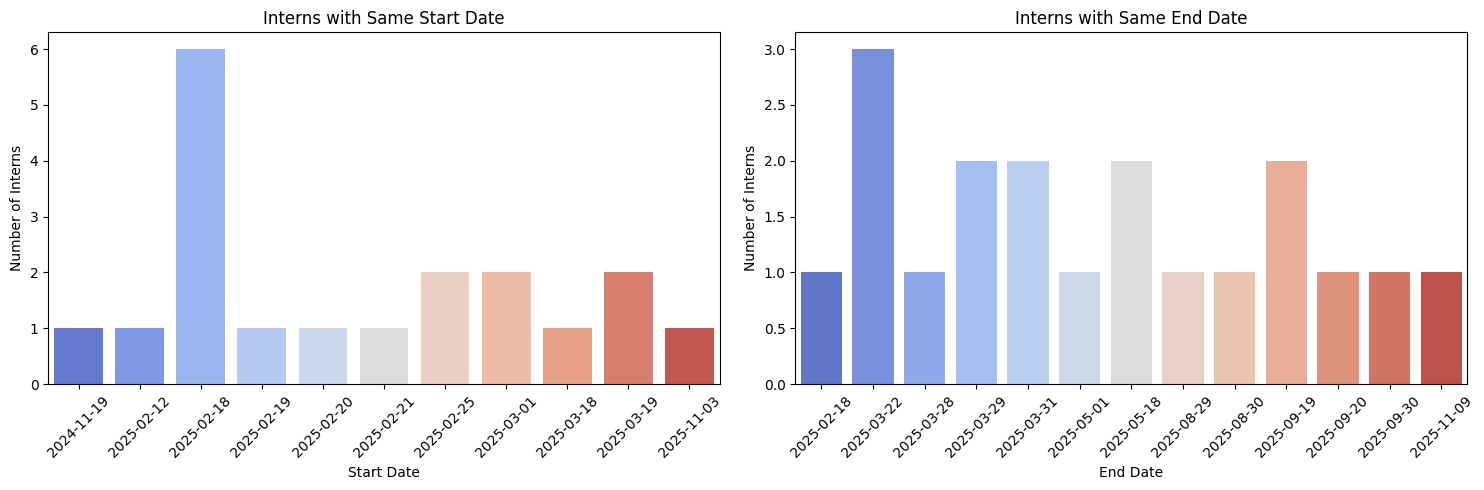

,Age
department,
Back-end,20.500000
Cyber security,21.333333
Data science,20.000000
Front-end,20.285714
Project management,20.000000


<ipython-input-11-b842c14e820f>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot( x= dept_mean.index, y=dept_mean.values, palette="coolwarm")


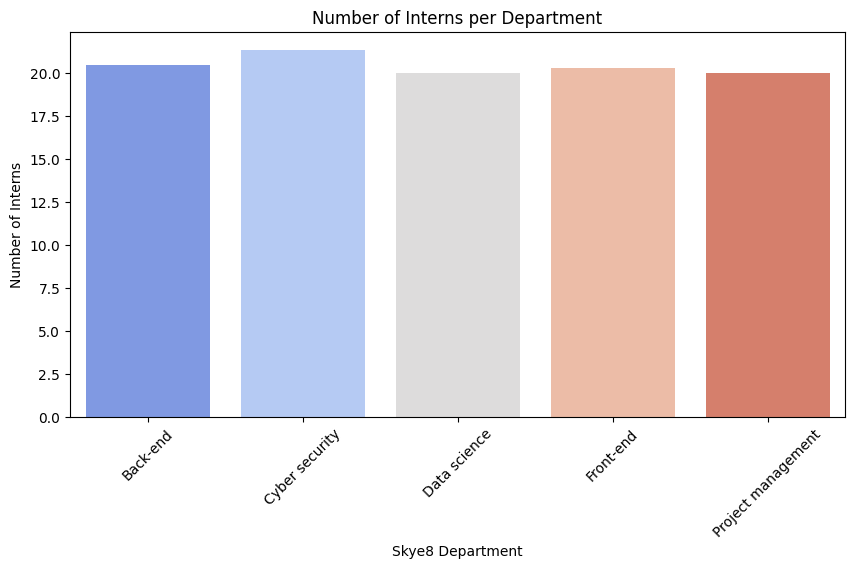

,Age
department,
Back-end,20.500000
Cyber security,21.333333
Data science,20.000000
Front-end,20.285714
Project management,20.000000


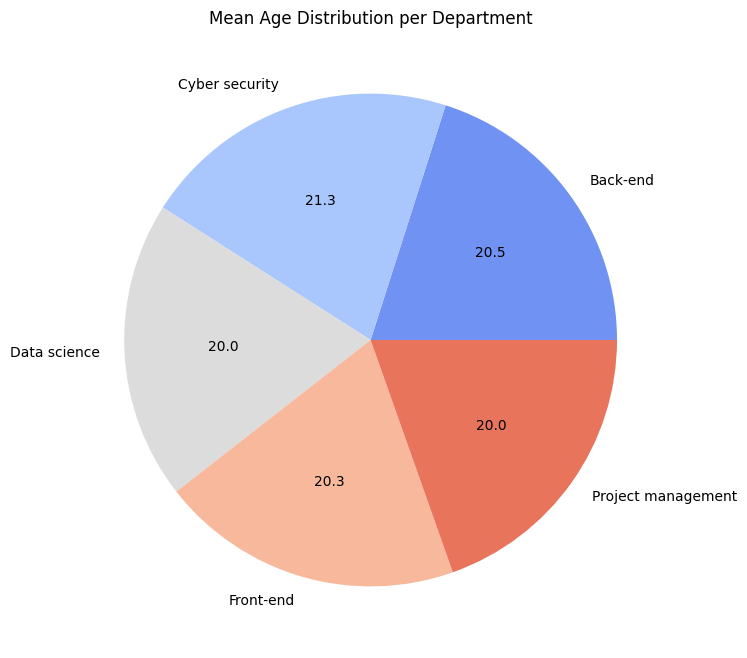

,Internship_Duration
School,
HICM,19.000000
COLTECH,30.285714
HIPDET,130.000000
NAHPI,154.222222


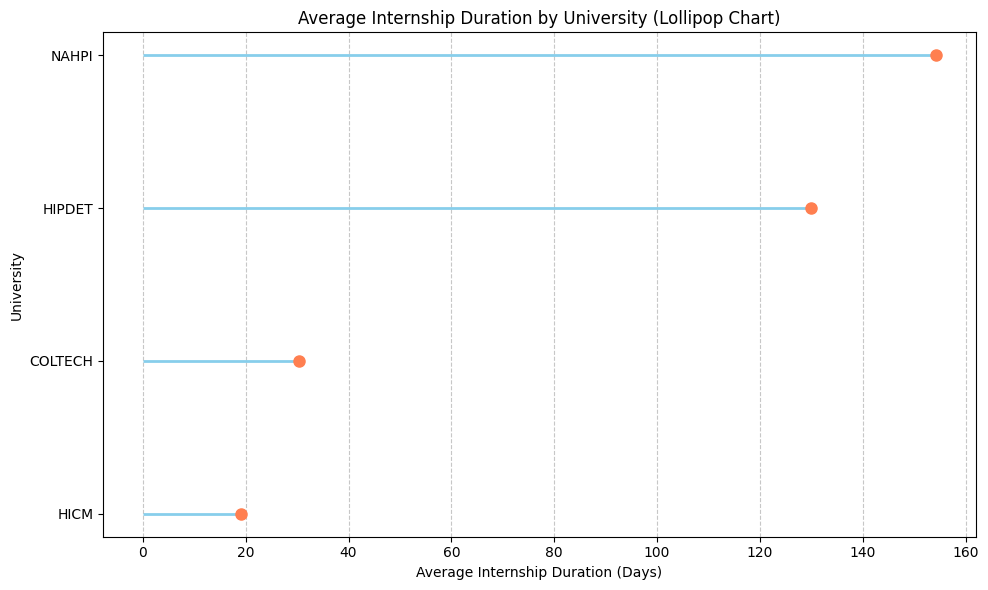

NameError: name 'data' is not defined

,Age,Gender,School,Start Date,End Date,Internship Goals,School d'pt,Stack,Highest Level of Education Completed,Internship_Duration
0,22,Male,NAHPI,2025-03-01,2025-08-30,Fulfill academic requirements \nImprove skills...,COMPUTER ENGINEERING,Data science,ADVANCED LEVEL,182
1,19,Male,COLTECH,2025-02-18,2025-03-22,1: gain practical experience in network securi...,COMPUTER ENGINEERING,Cyber security,ADVANCED LEVEL,32
2,21,Male,NAHPI,2025-03-19,2025-09-19,Gain development skill\nnetworking\ngain pract...,COMPUTER ENGINEERING,Back-end,ADVANCED LEVEL,184
3,19,Male,COLTECH,2025-02-18,2025-02-18,These are some of my goals for the internship ...,COMPUTER ENGINEERING,Cyber security,ADVANCED LEVEL,0
4,20,Male,COLTECH,2025-02-21,2025-03-22,"1. Learning the basics on html, css and javasc...",COMPUTER ENGINEERING,Front-end,ADVANCED LEVEL,29
5,20,Male,NAHPI,2025-02-18,2025-08-29,- To build my software development skills\n- T...,COMPUTER ENGINEERING,Back-end,ADVANCED LEVEL,192
6,20,Male,COLTECH,2025-02-12,2025-03-31,-get better at coding \n-be so good that I can...,COMPUTER ENGINEERING,Front-end,ADVANCED LEVEL,47
7,19,Female,COLTECH,2025-02-18,2025-03-31,User did not input anything,COMPUTER ENGINEERING,Front-end,ADVANCED LEVEL,41
8,22,Female,NAHPI,2025-03-18,2025-05-18,To know how to program using python \nTo do ma...,BIOMEDICAL ENGINEERING,Data science,ADVANCED LEVEL,61
9,21,Female,NAHPI,2025-02-18,2025-05-18,Learn how to code in Python\nAcquire skills in...,BIOMEDICAL ENGINEERING,Data science,ADVANCED LEVEL,89


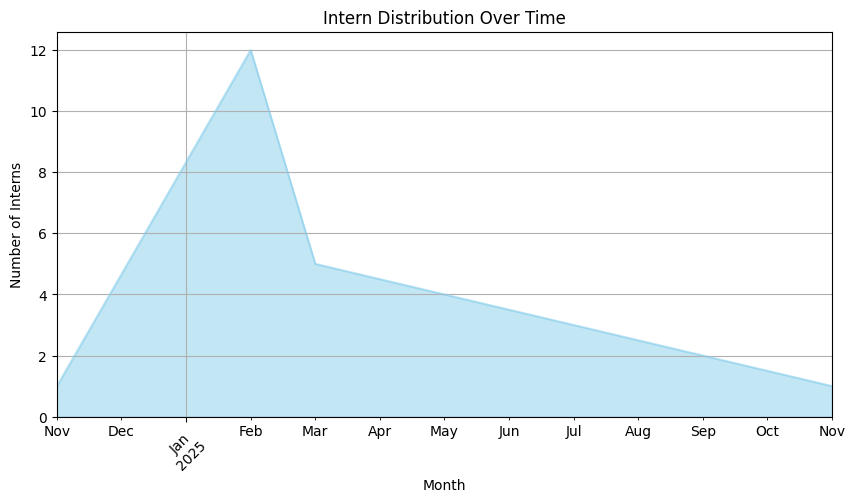

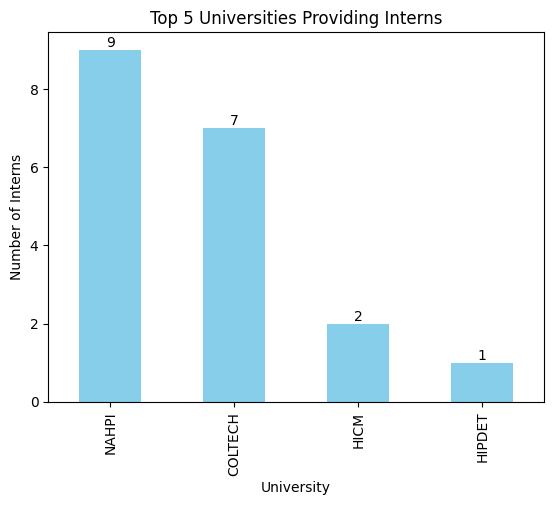

NameError: name 'df1' is not defined

<ipython-input-52-b5e1ed5f668d>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df1["Stack"], y=df1["Internship_Duration"], palette="coolwarm")


<Figure size 1000x500 with 0 Axes>

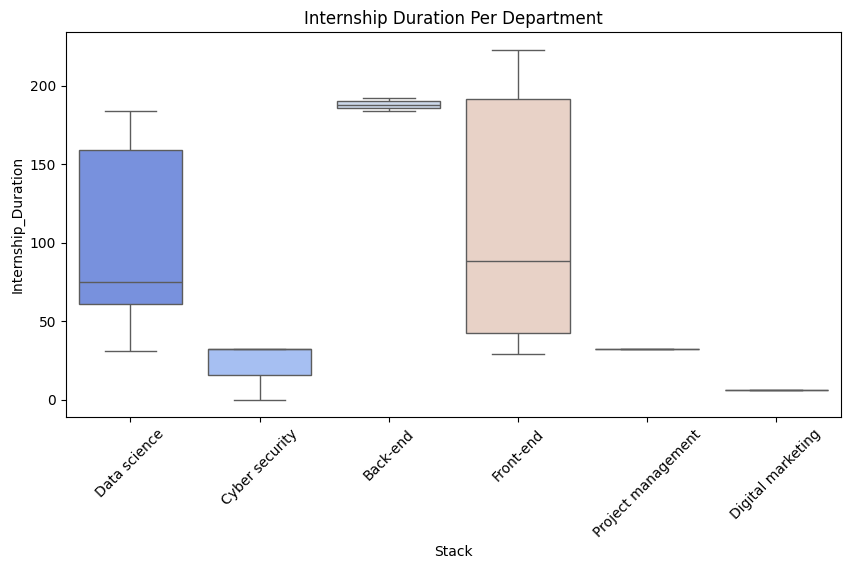

Cluster Analysis Done!


2025-03-21 14:12:25.435 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-03-21 14:12:25.436 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-03-21 14:12:25.439 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-03-21 14:12:25.440 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-03-21 14:12:25.527 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-03-21 14:12:25.528 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-03-21 14:12:25.529 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-03-21 14:12:25.532 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bar

KeyError: "None of [Index(['Encoded_Goals'], dtype='object')] are in the [columns]"

Longest Internship:
   Start Date   End Date  Internship_Duration  School      Stack
15 2025-02-19 2025-09-30                  223  NAHPI   Front-end

Shortest Internship:
  Start Date   End Date  Internship_Duration   School           Stack
3 2025-02-18 2025-02-18                    0  COLTECH  Cyber security


ValueError: shape mismatch: objects cannot be broadcast to a single shape.  Mismatch is between arg 0 with shape (2,) and arg 1 with shape (2, 1, 10).

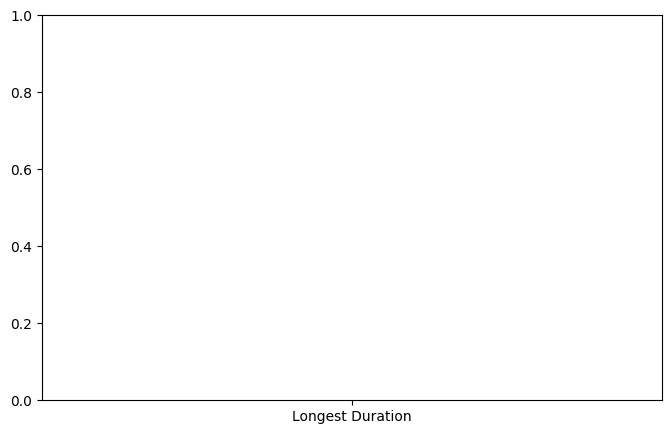

FileNotFoundError: [Errno 2] No such file or directory: 'new_File1.csv'

,Age,Gender,School,Start Date,End Date,Internship Goals,School d'pt,Stack,Highest Level of Education Completed
0,22,Male,NAHPI,2025-03-01,2025-08-30,Fulfill academic requirements \nImprove skills...,COMPUTER ENGINEERING,Data science,ADVANCED LEVEL
1,19,Male,COLTECH,2025-02-18,2025-03-22,1: gain practical experience in network securi...,COMPUTER ENGINEERING,Cyber security,ADVANCED LEVEL
2,21,Male,NAHPI,2025-03-19,2025-09-19,Gain development skill\nnetworking\ngain pract...,COMPUTER ENGINEERING,Back-end,ADVANCED LEVEL
3,19,Male,COLTECH,2025-02-18,2025-02-18,These are some of my goals for the internship ...,COMPUTER ENGINEERING,Cyber security,ADVANCED LEVEL
4,20,Male,COLTECH,2025-02-21,2025-03-22,"1. Learning the basics on html, css and javasc...",COMPUTER ENGINEERING,Front-end,ADVANCED LEVEL
5,20,Male,NAHPI,2025-02-18,2025-08-29,- To build my software development skills\n- T...,COMPUTER ENGINEERING,Back-end,ADVANCED LEVEL
6,20,Male,COLTECH,2025-02-12,2025-03-31,-get better at coding \n-be so good that I can...,COMPUTER ENGINEERING,Front-end,ADVANCED LEVEL
7,19,Female,COLTECH,2025-02-18,2025-03-31,User did not input anything,COMPUTER ENGINEERING,Front-end,ADVANCED LEVEL
8,22,Female,NAHPI,2025-03-18,2025-05-18,To know how to program using python \nTo do ma...,BIOMEDICAL ENGINEERING,Data science,ADVANCED LEVEL
9,21,Female,NAHPI,2025-02-18,2025-05-18,Learn how to code in Python\nAcquire skills in...,BIOMEDICAL ENGINEERING,Data science,ADVANCED LEVEL


,abt_skye8,why_skye8,is_first_time_at_skye8,department,Intern_rating,Alligiment_of_task_with_school,why,Gained_skils,Sufficiency_of_resources,How approachable and supportive are the supervisors?,...,Description_of_working_environment,how_inclusive_you_fet_into_the_team,valued_as_intern,was_encouraged_to_share_ideas,challenges_faced,how_skye8_cam_improve_intern_satisfaction,how_satified_are_interns,will_recomend_internship_to_others,would_like_to_work_at_skye8,"Any additional comments or feedback? \n(Open-ended, you can share anything else you feel is important)"
0,Friends/Family,I actually did internship in year1 at skye8 so...,No,Back-end,Good,Yes,The task provided actually help us practicaliz...,I'm still starting internship.,Yes,Good,...,"The work environment is friendly, good, intera...",4,3,Yes,I'm still starting out the internship.,Creation of outdoor activities per time.,7,Yes,Yes,User did not input anything
1,Social Media,Because I heard of their innovative dreams of ...,Yes,Front-end,Good,Yes,Because all the tasks given align to the front...,As a newbie in the front end development strea...,Yes,Satisfactory,...,Learning focused,4,4,Yes,Unclear expectations,User did not input anything,8,Yes,Yes,User did not input anything
2,Friends/Family,because they separate interns into different s...,No,Front-end,Good,Yes,"the tasks we get concern only our department, ...",how to work with teams and manage work files,Yes,Good,...,"Friendly, stressful, fun, learning-focused",4,3,Yes,Mostly the time for task completion was not th...,"actually, I think they are doing a great job, ...",8,Yes,Yes,nope noting in mind
3,Friends/Family,Mainly because it's closest to my home and als...,Yes,Back-end,Very good,Yes,My academic goal is to acquire enough skills a...,Backend development -- very productive\nMy cri...,Yes,Very good,...,"Friendly, learning-focused, professional and fun",5,4,Yes,poor communication amongst interns,Better communication overall,9,Yes,Yes,Nothing else
4,Friends/Family,Because it was the best choice I had,No,Front-end,Good,Yes,I have learnt a lot,"I have gain knowledge in HTML,CSS, and JavaScript",Yes,Good,...,"stressful ,friendly",3,3,Maybe,"high work load, unclear expectation",More structured training (possibly an outline ...,5,Maybe,Maybe,User did not input anything
5,Friends/Family,I choose Skye8 because it have a good reputati...,Yes,Data science,Very good,Yes,Because they task given were concern with my f...,Learn professional basics,Yes,Very good,...,Friendly,5,5,Yes,Unclear expectations,Should make interaction with more people outsi...,8,Yes,Yes,Some days apart from Saturday \nStudents can w...
6,Friends/Family,I choosed skye8 because I got very positive re...,Yes,Front-end,Satisfactory,Yes,The projects assigned to me where quite challe...,"I have enhanced my skills on html, css and js",Yes,Good,...,The work environment at skye8 is very friendly...,4,1,Yes,The only challenge I face at skye8 is the subm...,I think skye8 can improve on task time schedul...,6,Yes,Yes,User did not input anything
7,Friends/Family,Because it help to build the future,Yes,Front-end,Good,Yes,because it been a help to me,i have gain alot all thanks to my supervisor,Yes,Good,...,Friendly,5,1,Yes,Faced alot with the JavaScript,More structured training,10,Yes,Yes,I will love to come to Skye8 because it very g...
8,Social Media,Because I believe that I can gain the skills I...,No,Front-end,Good,Yes,The task assigned to me where quite challengin...,I have gain a lot but not yet applicable,Yes,Satisfactory,...,Learning-focused,3,3,Maybe,Poor communication,More structured training,5,Yes,Yes,User did not input anything
9,Friends/Family,Because it was the best choice i had,No,Front-end,Good,Yes,I have managed to learn a lot so far,"I have gained knowledge in HTML,CSS and JavaS...",Yes,Good,...,"stressful, friendly",3,3,Maybe,High workload\nUnclear expectations\nMental ex...,Make a course outline of what the interns are ...,5,Maybe,Maybe,User did not

<ipython-input-6-08e22d377c51>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=dept_counts.index, y=dept_counts.values, palette="coolwarm")


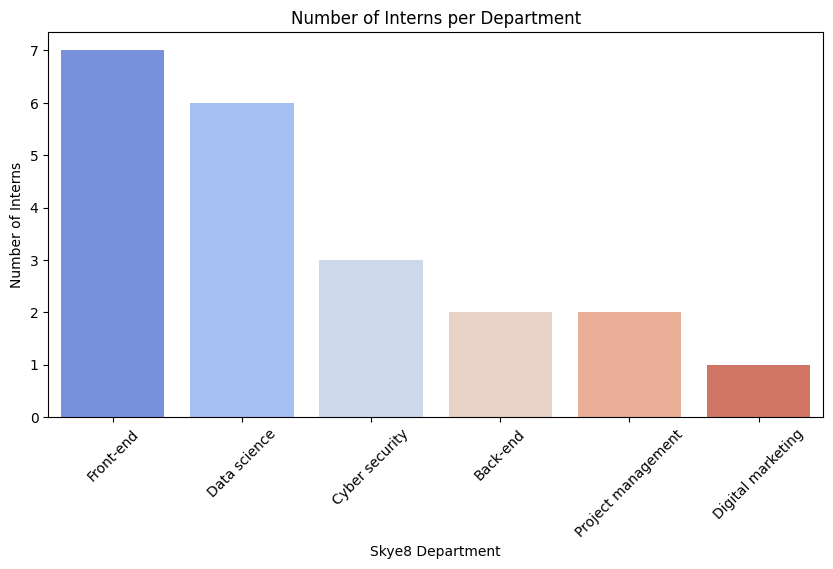

School  COLTECH  HICM  HIPDET  NAHPI
Gender                              
Female        1     1       1      4
Male          6     1       0      5


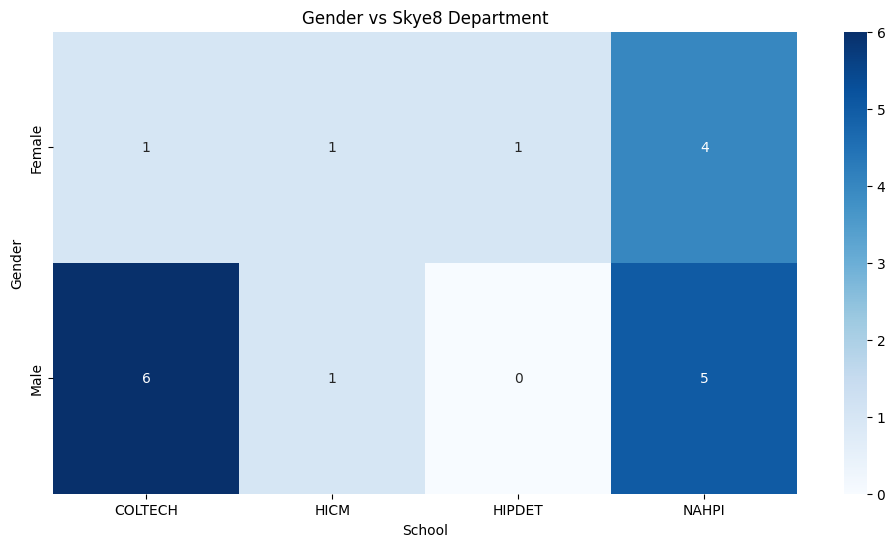

   Start Date  Intern_Count
0  2024-11-19             1
1  2025-02-12             1
2  2025-02-18             6
3  2025-02-19             1
4  2025-02-20             1
5  2025-02-21             1
6  2025-02-25             2
7  2025-03-01             2
8  2025-03-18             1
9  2025-03-19             2
10 2025-11-03             1
     End Date  Intern_Count
0  2025-02-18             1
1  2025-03-22             3
2  2025-03-28             1
3  2025-03-29             2
4  2025-03-31             2
5  2025-05-01             1
6  2025-05-18             2
7  2025-08-29             1
8  2025-08-30             1
9  2025-09-19             2
10 2025-09-20             1
11 2025-09-30             1
12 2025-11-09             1


<ipython-input-9-459b74cb7bdc>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
<ipython-input-9-459b74cb7bdc>:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


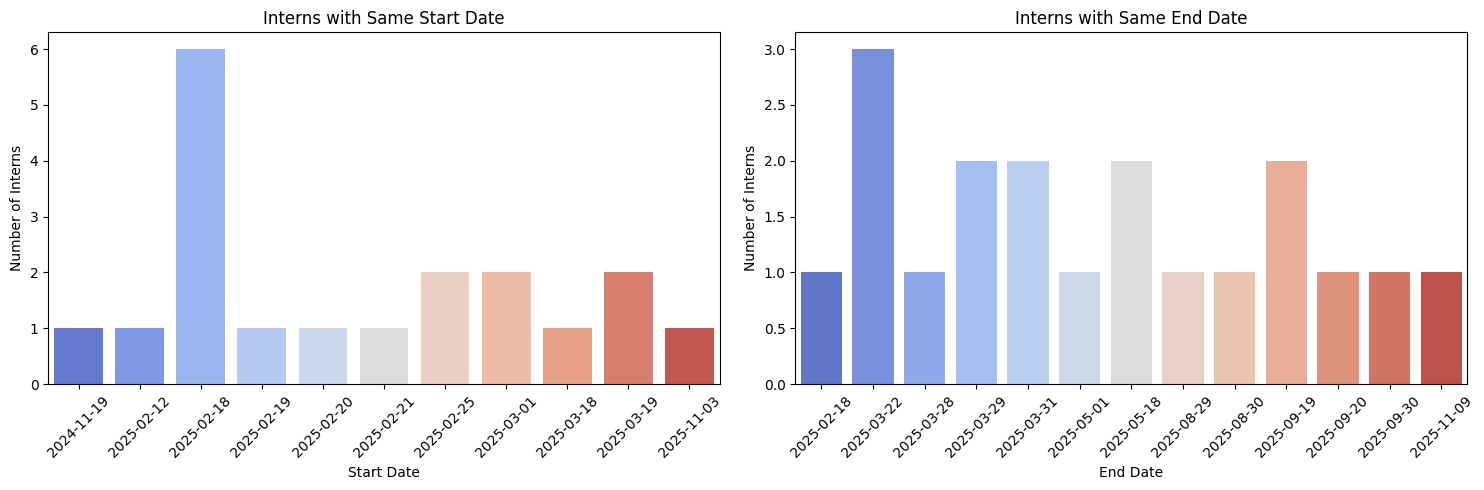

,Age
department,
Back-end,20.500000
Cyber security,21.333333
Data science,20.000000
Front-end,20.285714
Project management,20.000000


<ipython-input-11-b842c14e820f>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot( x= dept_mean.index, y=dept_mean.values, palette="coolwarm")


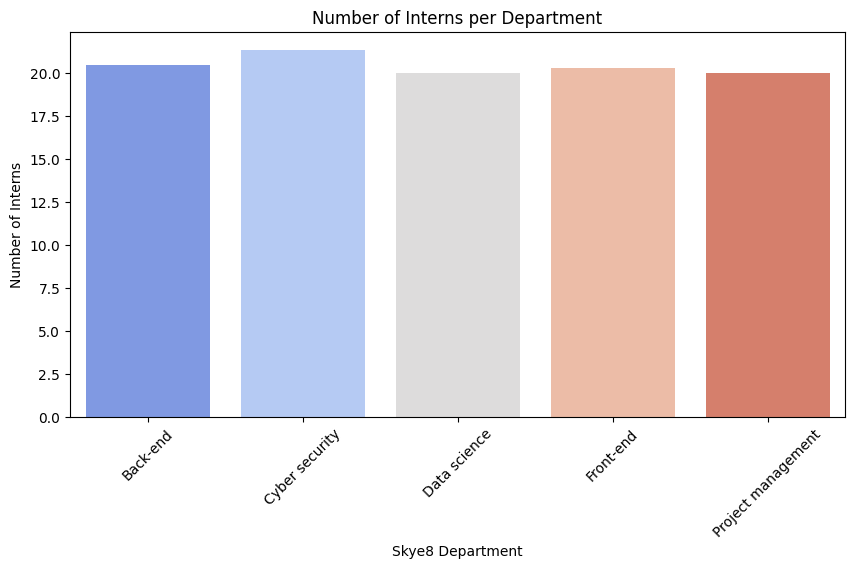

,Age
department,
Back-end,20.500000
Cyber security,21.333333
Data science,20.000000
Front-end,20.285714
Project management,20.000000


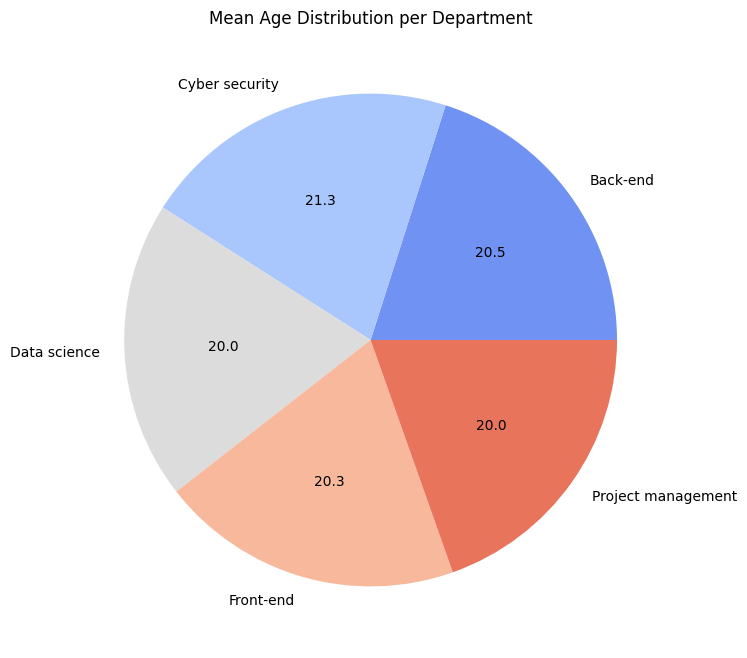

,Internship_Duration
School,
HICM,19.000000
COLTECH,30.285714
HIPDET,130.000000
NAHPI,154.222222


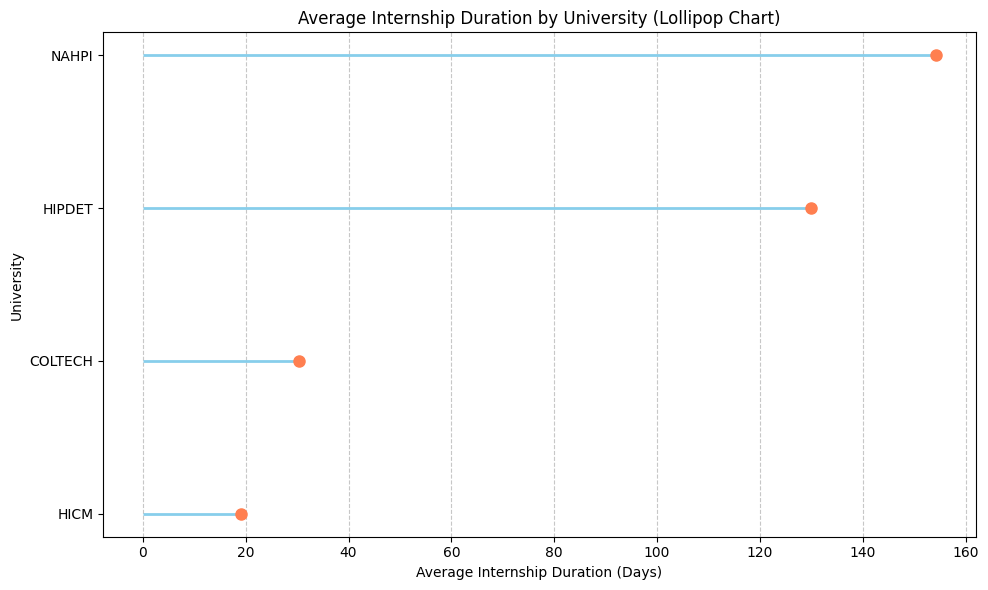

NameError: name 'data' is not defined

,Age,Gender,School,Start Date,End Date,Internship Goals,School d'pt,Stack,Highest Level of Education Completed,Internship_Duration
0,22,Male,NAHPI,2025-03-01,2025-08-30,Fulfill academic requirements \nImprove skills...,COMPUTER ENGINEERING,Data science,ADVANCED LEVEL,182
1,19,Male,COLTECH,2025-02-18,2025-03-22,1: gain practical experience in network securi...,COMPUTER ENGINEERING,Cyber security,ADVANCED LEVEL,32
2,21,Male,NAHPI,2025-03-19,2025-09-19,Gain development skill\nnetworking\ngain pract...,COMPUTER ENGINEERING,Back-end,ADVANCED LEVEL,184
3,19,Male,COLTECH,2025-02-18,2025-02-18,These are some of my goals for the internship ...,COMPUTER ENGINEERING,Cyber security,ADVANCED LEVEL,0
4,20,Male,COLTECH,2025-02-21,2025-03-22,"1. Learning the basics on html, css and javasc...",COMPUTER ENGINEERING,Front-end,ADVANCED LEVEL,29
5,20,Male,NAHPI,2025-02-18,2025-08-29,- To build my software development skills\n- T...,COMPUTER ENGINEERING,Back-end,ADVANCED LEVEL,192
6,20,Male,COLTECH,2025-02-12,2025-03-31,-get better at coding \n-be so good that I can...,COMPUTER ENGINEERING,Front-end,ADVANCED LEVEL,47
7,19,Female,COLTECH,2025-02-18,2025-03-31,User did not input anything,COMPUTER ENGINEERING,Front-end,ADVANCED LEVEL,41
8,22,Female,NAHPI,2025-03-18,2025-05-18,To know how to program using python \nTo do ma...,BIOMEDICAL ENGINEERING,Data science,ADVANCED LEVEL,61
9,21,Female,NAHPI,2025-02-18,2025-05-18,Learn how to code in Python\nAcquire skills in...,BIOMEDICAL ENGINEERING,Data science,ADVANCED LEVEL,89


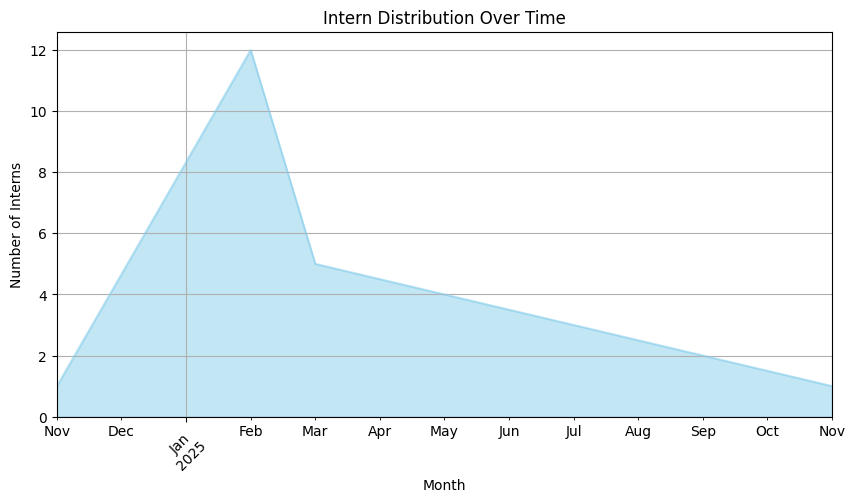

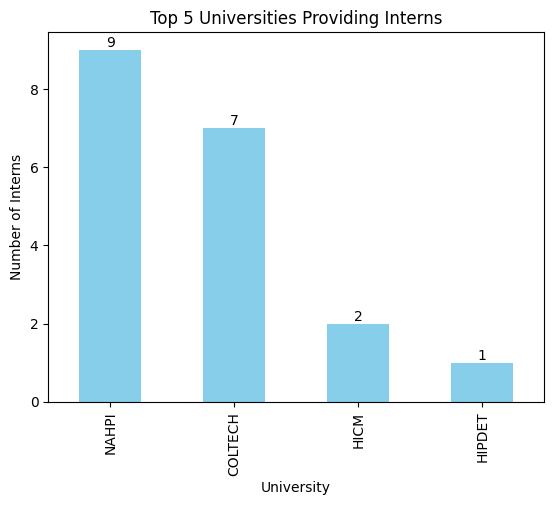

NameError: name 'df1' is not defined

<ipython-input-52-b5e1ed5f668d>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df1["Stack"], y=df1["Internship_Duration"], palette="coolwarm")


<Figure size 1000x500 with 0 Axes>

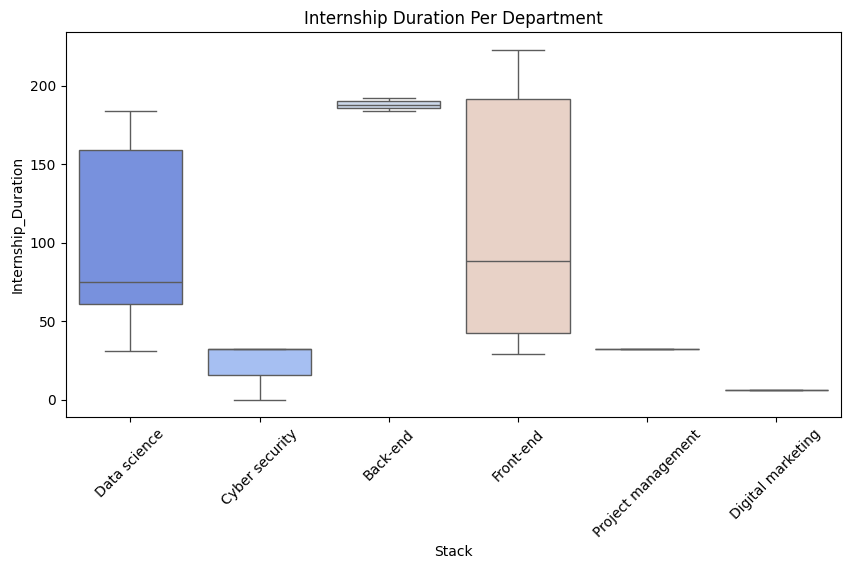

Cluster Analysis Done!


2025-03-21 14:12:25.435 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-03-21 14:12:25.436 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-03-21 14:12:25.439 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-03-21 14:12:25.440 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-03-21 14:12:25.527 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-03-21 14:12:25.528 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-03-21 14:12:25.529 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-03-21 14:12:25.532 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bar

KeyError: "None of [Index(['Encoded_Goals'], dtype='object')] are in the [columns]"

Longest Internship:
   Start Date   End Date  Internship_Duration  School      Stack
15 2025-02-19 2025-09-30                  223  NAHPI   Front-end

Shortest Internship:
  Start Date   End Date  Internship_Duration   School           Stack
3 2025-02-18 2025-02-18                    0  COLTECH  Cyber security


ValueError: shape mismatch: objects cannot be broadcast to a single shape.  Mismatch is between arg 0 with shape (2,) and arg 1 with shape (2, 1, 10).

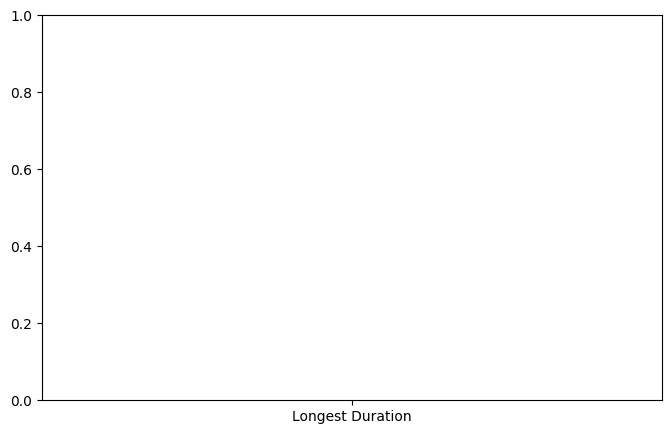

FileNotFoundError: [Errno 2] No such file or directory: 'new_File1.csv'

,Age,Gender,School,Start Date,End Date,Internship Goals,School d'pt,Stack,Highest Level of Education Completed
0,22,Male,NAHPI,2025-03-01,2025-08-30,Fulfill academic requirements \nImprove skills...,COMPUTER ENGINEERING,Data science,ADVANCED LEVEL
1,19,Male,COLTECH,2025-02-18,2025-03-22,1: gain practical experience in network securi...,COMPUTER ENGINEERING,Cyber security,ADVANCED LEVEL
2,21,Male,NAHPI,2025-03-19,2025-09-19,Gain development skill\nnetworking\ngain pract...,COMPUTER ENGINEERING,Back-end,ADVANCED LEVEL
3,19,Male,COLTECH,2025-02-18,2025-02-18,These are some of my goals for the internship ...,COMPUTER ENGINEERING,Cyber security,ADVANCED LEVEL
4,20,Male,COLTECH,2025-02-21,2025-03-22,"1. Learning the basics on html, css and javasc...",COMPUTER ENGINEERING,Front-end,ADVANCED LEVEL
5,20,Male,NAHPI,2025-02-18,2025-08-29,- To build my software development skills\n- T...,COMPUTER ENGINEERING,Back-end,ADVANCED LEVEL
6,20,Male,COLTECH,2025-02-12,2025-03-31,-get better at coding \n-be so good that I can...,COMPUTER ENGINEERING,Front-end,ADVANCED LEVEL
7,19,Female,COLTECH,2025-02-18,2025-03-31,User did not input anything,COMPUTER ENGINEERING,Front-end,ADVANCED LEVEL
8,22,Female,NAHPI,2025-03-18,2025-05-18,To know how to program using python \nTo do ma...,BIOMEDICAL ENGINEERING,Data science,ADVANCED LEVEL
9,21,Female,NAHPI,2025-02-18,2025-05-18,Learn how to code in Python\nAcquire skills in...,BIOMEDICAL ENGINEERING,Data science,ADVANCED LEVEL


,abt_skye8,why_skye8,is_first_time_at_skye8,department,Intern_rating,Alligiment_of_task_with_school,why,Gained_skils,Sufficiency_of_resources,How approachable and supportive are the supervisors?,...,Description_of_working_environment,how_inclusive_you_fet_into_the_team,valued_as_intern,was_encouraged_to_share_ideas,challenges_faced,how_skye8_cam_improve_intern_satisfaction,how_satified_are_interns,will_recomend_internship_to_others,would_like_to_work_at_skye8,"Any additional comments or feedback? \n(Open-ended, you can share anything else you feel is important)"
0,Friends/Family,I actually did internship in year1 at skye8 so...,No,Back-end,Good,Yes,The task provided actually help us practicaliz...,I'm still starting internship.,Yes,Good,...,"The work environment is friendly, good, intera...",4,3,Yes,I'm still starting out the internship.,Creation of outdoor activities per time.,7,Yes,Yes,User did not input anything
1,Social Media,Because I heard of their innovative dreams of ...,Yes,Front-end,Good,Yes,Because all the tasks given align to the front...,As a newbie in the front end development strea...,Yes,Satisfactory,...,Learning focused,4,4,Yes,Unclear expectations,User did not input anything,8,Yes,Yes,User did not input anything
2,Friends/Family,because they separate interns into different s...,No,Front-end,Good,Yes,"the tasks we get concern only our department, ...",how to work with teams and manage work files,Yes,Good,...,"Friendly, stressful, fun, learning-focused",4,3,Yes,Mostly the time for task completion was not th...,"actually, I think they are doing a great job, ...",8,Yes,Yes,nope noting in mind
3,Friends/Family,Mainly because it's closest to my home and als...,Yes,Back-end,Very good,Yes,My academic goal is to acquire enough skills a...,Backend development -- very productive\nMy cri...,Yes,Very good,...,"Friendly, learning-focused, professional and fun",5,4,Yes,poor communication amongst interns,Better communication overall,9,Yes,Yes,Nothing else
4,Friends/Family,Because it was the best choice I had,No,Front-end,Good,Yes,I have learnt a lot,"I have gain knowledge in HTML,CSS, and JavaScript",Yes,Good,...,"stressful ,friendly",3,3,Maybe,"high work load, unclear expectation",More structured training (possibly an outline ...,5,Maybe,Maybe,User did not input anything
5,Friends/Family,I choose Skye8 because it have a good reputati...,Yes,Data science,Very good,Yes,Because they task given were concern with my f...,Learn professional basics,Yes,Very good,...,Friendly,5,5,Yes,Unclear expectations,Should make interaction with more people outsi...,8,Yes,Yes,Some days apart from Saturday \nStudents can w...
6,Friends/Family,I choosed skye8 because I got very positive re...,Yes,Front-end,Satisfactory,Yes,The projects assigned to me where quite challe...,"I have enhanced my skills on html, css and js",Yes,Good,...,The work environment at skye8 is very friendly...,4,1,Yes,The only challenge I face at skye8 is the subm...,I think skye8 can improve on task time schedul...,6,Yes,Yes,User did not input anything
7,Friends/Family,Because it help to build the future,Yes,Front-end,Good,Yes,because it been a help to me,i have gain alot all thanks to my supervisor,Yes,Good,...,Friendly,5,1,Yes,Faced alot with the JavaScript,More structured training,10,Yes,Yes,I will love to come to Skye8 because it very g...
8,Social Media,Because I believe that I can gain the skills I...,No,Front-end,Good,Yes,The task assigned to me where quite challengin...,I have gain a lot but not yet applicable,Yes,Satisfactory,...,Learning-focused,3,3,Maybe,Poor communication,More structured training,5,Yes,Yes,User did not input anything
9,Friends/Family,Because it was the best choice i had,No,Front-end,Good,Yes,I have managed to learn a lot so far,"I have gained knowledge in HTML,CSS and JavaS...",Yes,Good,...,"stressful, friendly",3,3,Maybe,High workload\nUnclear expectations\nMental ex...,Make a course outline of what the interns are ...,5,Maybe,Maybe,User did not

<ipython-input-6-08e22d377c51>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=dept_counts.index, y=dept_counts.values, palette="coolwarm")


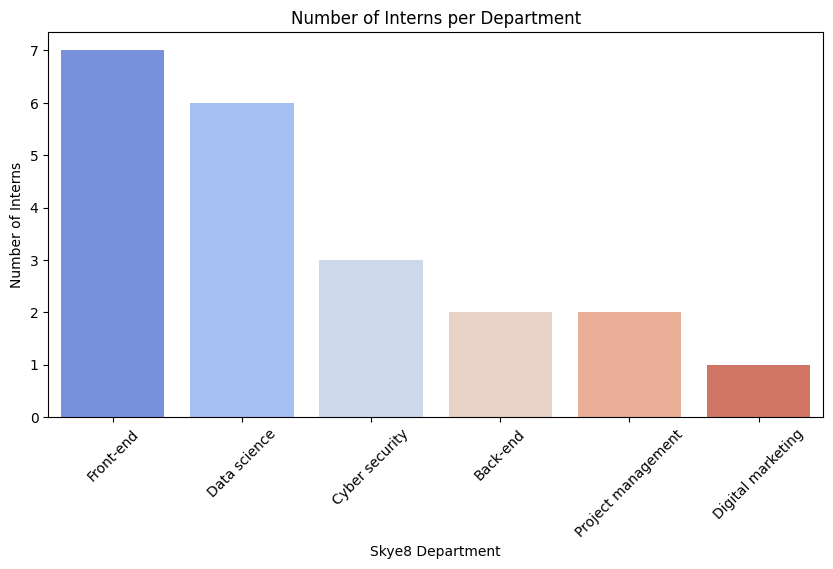

School  COLTECH  HICM  HIPDET  NAHPI
Gender                              
Female        1     1       1      4
Male          6     1       0      5


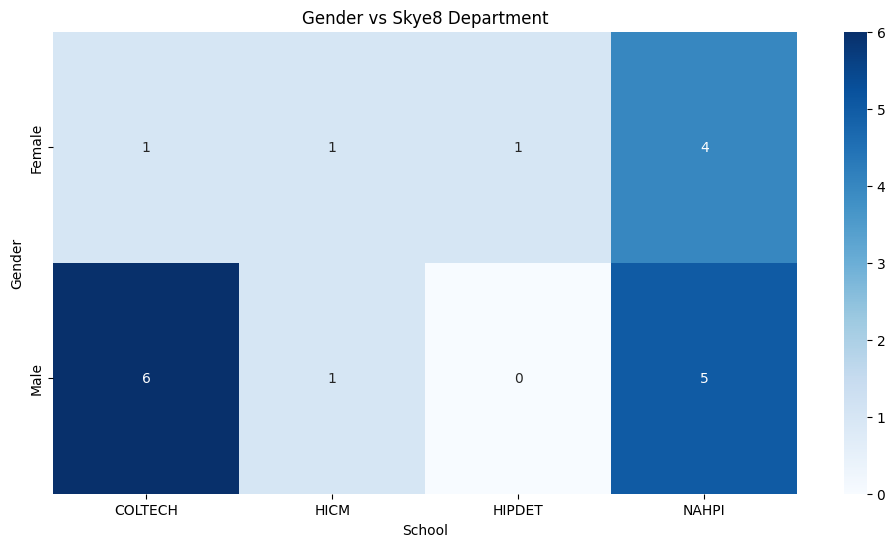

   Start Date  Intern_Count
0  2024-11-19             1
1  2025-02-12             1
2  2025-02-18             6
3  2025-02-19             1
4  2025-02-20             1
5  2025-02-21             1
6  2025-02-25             2
7  2025-03-01             2
8  2025-03-18             1
9  2025-03-19             2
10 2025-11-03             1
     End Date  Intern_Count
0  2025-02-18             1
1  2025-03-22             3
2  2025-03-28             1
3  2025-03-29             2
4  2025-03-31             2
5  2025-05-01             1
6  2025-05-18             2
7  2025-08-29             1
8  2025-08-30             1
9  2025-09-19             2
10 2025-09-20             1
11 2025-09-30             1
12 2025-11-09             1


<ipython-input-9-459b74cb7bdc>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
<ipython-input-9-459b74cb7bdc>:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


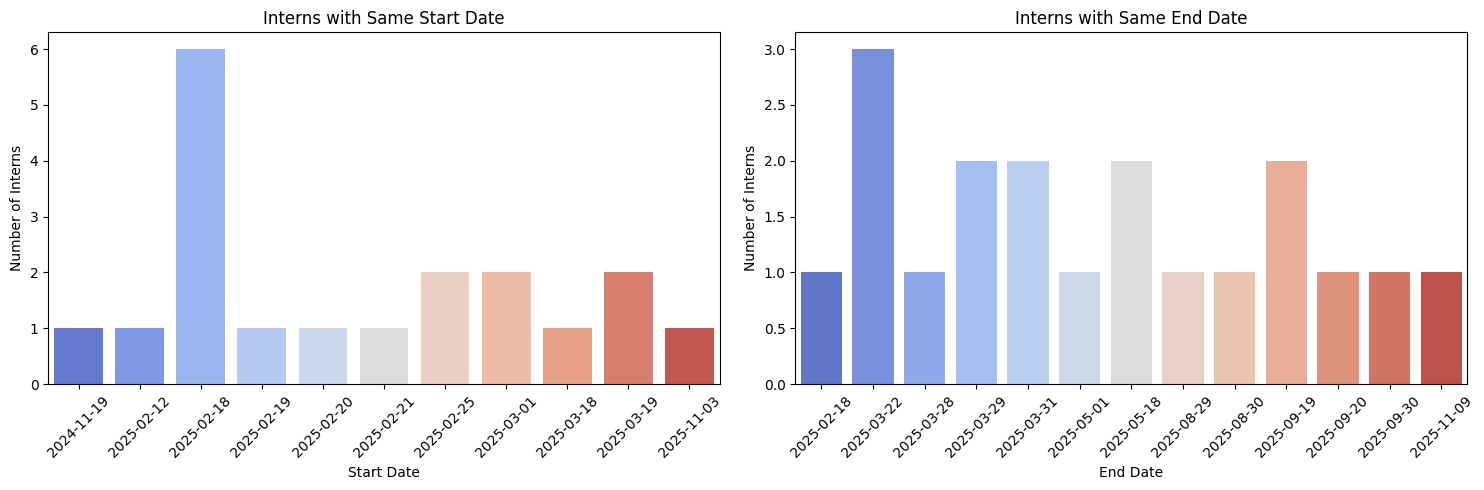

,Age
department,
Back-end,20.500000
Cyber security,21.333333
Data science,20.000000
Front-end,20.285714
Project management,20.000000


<ipython-input-11-b842c14e820f>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot( x= dept_mean.index, y=dept_mean.values, palette="coolwarm")


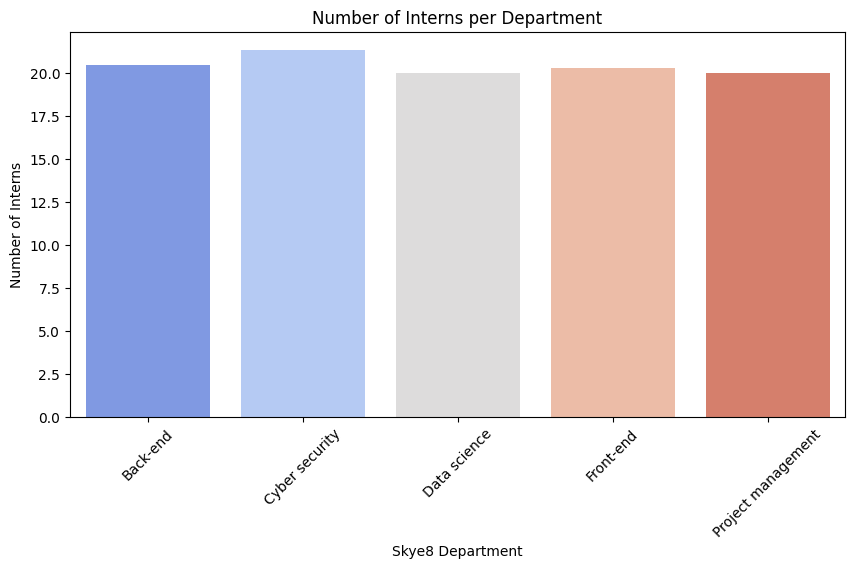

,Age
department,
Back-end,20.500000
Cyber security,21.333333
Data science,20.000000
Front-end,20.285714
Project management,20.000000


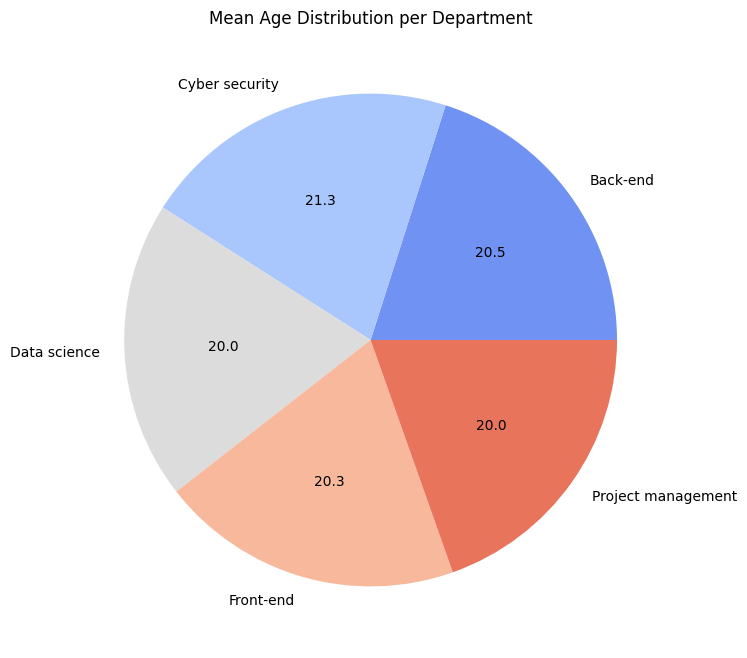

,Internship_Duration
School,
HICM,19.000000
COLTECH,30.285714
HIPDET,130.000000
NAHPI,154.222222


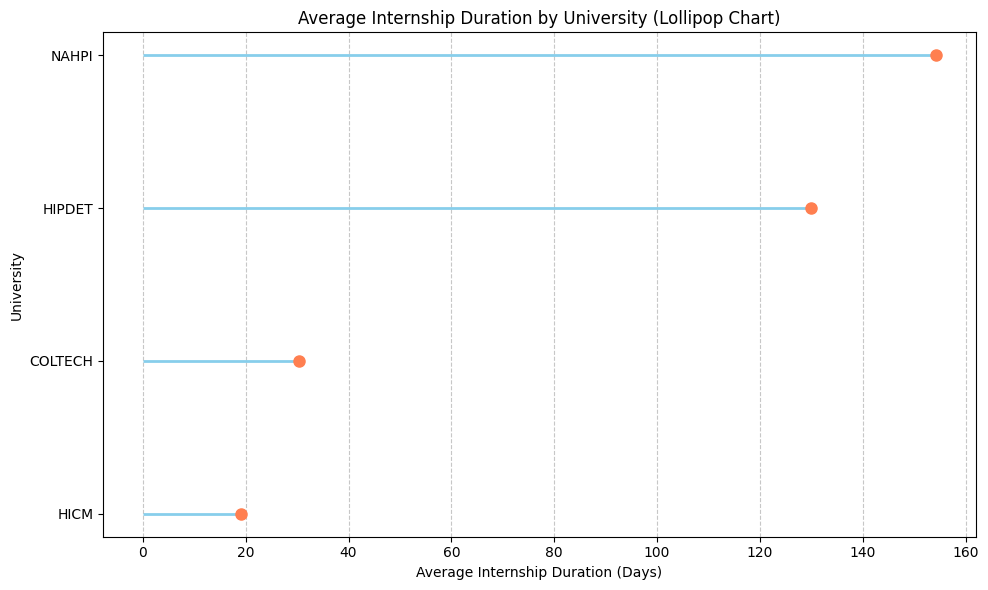

NameError: name 'data' is not defined

,Age,Gender,School,Start Date,End Date,Internship Goals,School d'pt,Stack,Highest Level of Education Completed,Internship_Duration
0,22,Male,NAHPI,2025-03-01,2025-08-30,Fulfill academic requirements \nImprove skills...,COMPUTER ENGINEERING,Data science,ADVANCED LEVEL,182
1,19,Male,COLTECH,2025-02-18,2025-03-22,1: gain practical experience in network securi...,COMPUTER ENGINEERING,Cyber security,ADVANCED LEVEL,32
2,21,Male,NAHPI,2025-03-19,2025-09-19,Gain development skill\nnetworking\ngain pract...,COMPUTER ENGINEERING,Back-end,ADVANCED LEVEL,184
3,19,Male,COLTECH,2025-02-18,2025-02-18,These are some of my goals for the internship ...,COMPUTER ENGINEERING,Cyber security,ADVANCED LEVEL,0
4,20,Male,COLTECH,2025-02-21,2025-03-22,"1. Learning the basics on html, css and javasc...",COMPUTER ENGINEERING,Front-end,ADVANCED LEVEL,29
5,20,Male,NAHPI,2025-02-18,2025-08-29,- To build my software development skills\n- T...,COMPUTER ENGINEERING,Back-end,ADVANCED LEVEL,192
6,20,Male,COLTECH,2025-02-12,2025-03-31,-get better at coding \n-be so good that I can...,COMPUTER ENGINEERING,Front-end,ADVANCED LEVEL,47
7,19,Female,COLTECH,2025-02-18,2025-03-31,User did not input anything,COMPUTER ENGINEERING,Front-end,ADVANCED LEVEL,41
8,22,Female,NAHPI,2025-03-18,2025-05-18,To know how to program using python \nTo do ma...,BIOMEDICAL ENGINEERING,Data science,ADVANCED LEVEL,61
9,21,Female,NAHPI,2025-02-18,2025-05-18,Learn how to code in Python\nAcquire skills in...,BIOMEDICAL ENGINEERING,Data science,ADVANCED LEVEL,89


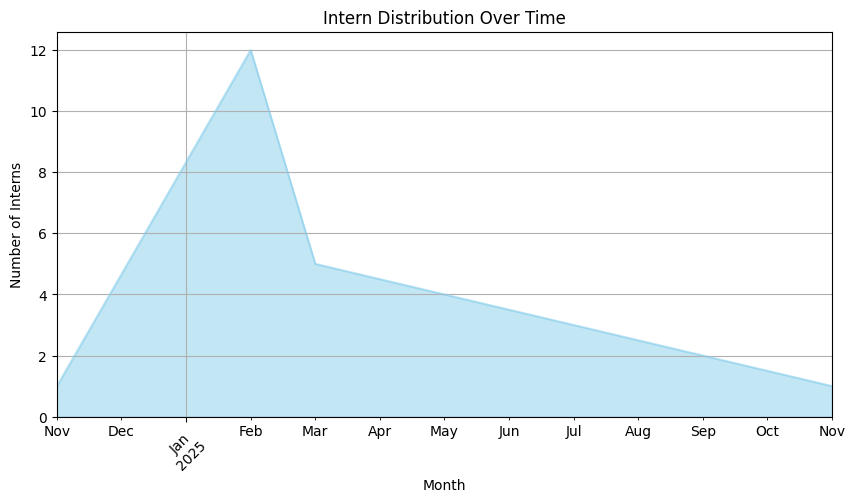

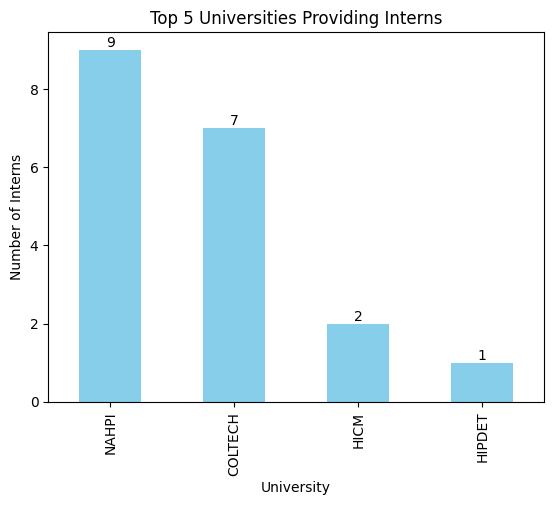

NameError: name 'df1' is not defined

<ipython-input-52-b5e1ed5f668d>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df1["Stack"], y=df1["Internship_Duration"], palette="coolwarm")


<Figure size 1000x500 with 0 Axes>

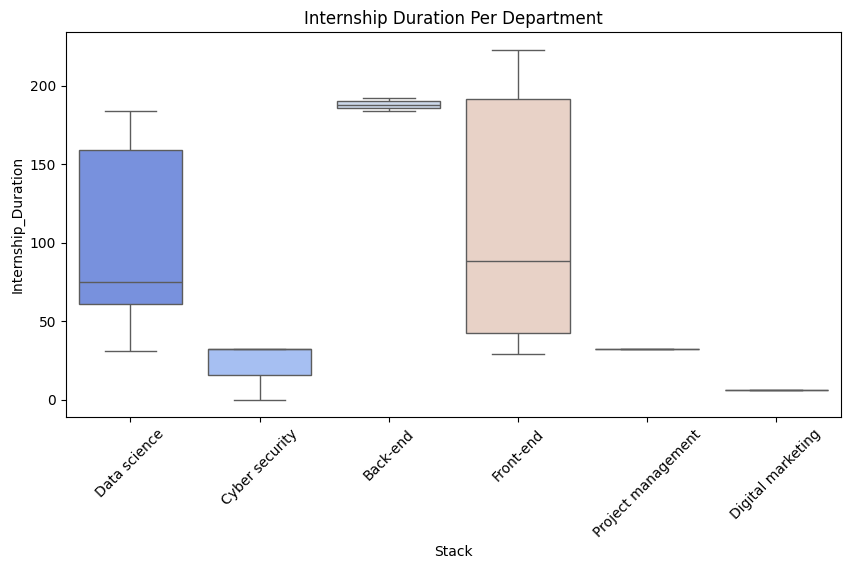

Cluster Analysis Done!


2025-03-21 14:12:25.435 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-03-21 14:12:25.436 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-03-21 14:12:25.439 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-03-21 14:12:25.440 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-03-21 14:12:25.527 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-03-21 14:12:25.528 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-03-21 14:12:25.529 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-03-21 14:12:25.532 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bar

KeyError: "None of [Index(['Encoded_Goals'], dtype='object')] are in the [columns]"

Longest Internship:
   Start Date   End Date  Internship_Duration  School      Stack
15 2025-02-19 2025-09-30                  223  NAHPI   Front-end

Shortest Internship:
  Start Date   End Date  Internship_Duration   School           Stack
3 2025-02-18 2025-02-18                    0  COLTECH  Cyber security


ValueError: shape mismatch: objects cannot be broadcast to a single shape.  Mismatch is between arg 0 with shape (2,) and arg 1 with shape (2, 1, 10).

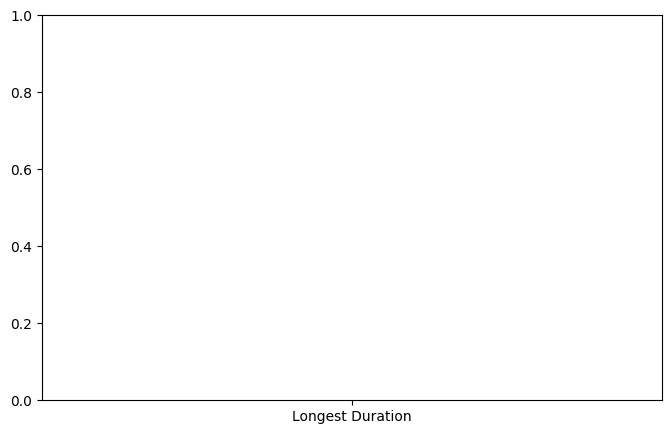

In [ ]:
# Interactive Streamlit Dashboard
def run_dashboard():
    st.title("Internship Insights Dashboard")
    st.subheader("Intern Distribution Over Time")
    st.line_chart(df1.groupby(df1["Start Date"].dt.to_period("M")).size())

    st.subheader("Top 5 Universities Providing Interns")
    st.bar_chart(top_universities)

    st.subheader("Internship Duration Per Department")
    st.pyplot(sns.boxplot(x=df1["Stack"], y=df1["Internship_Duration"], palette="coolwarm").get_figure())

if __name__ == "__main__":
    run_dashboard()

2025-03-21 14:12:25.435 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-03-21 14:12:25.436 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-03-21 14:12:25.439 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-03-21 14:12:25.440 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-03-21 14:12:25.527 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-03-21 14:12:25.528 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-03-21 14:12:25.529 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-03-21 14:12:25.532 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bar

In [ ]:
# Predict department assignment using classification
X = df1[["Encoded_Goals"]]
y = df1["Stack"].astype(str)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = RandomForestClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print("Department Prediction Accuracy:", accuracy_score(y_test, y_pred))

KeyError: "None of [Index(['Encoded_Goals'], dtype='object')] are in the [columns]"

In [ ]:
# Find longest/shortest durations
longest = df1[df1['Internship_Duration'] == df1['Internship_Duration'].max()]
shortest = df1[df1['Internship_Duration'] == df1['Internship_Duration'].min()]

print("Longest Internship:")
print(longest[['Start Date', 'End Date', 'Internship_Duration', 'School', 'Stack']])
print("\nShortest Internship:")
print(shortest[['Start Date', 'End Date', 'Internship_Duration', 'School', 'Stack']])

Longest Internship:
   Start Date   End Date  Internship_Duration  School      Stack
15 2025-02-19 2025-09-30                  223  NAHPI   Front-end

Shortest Internship:
  Start Date   End Date  Internship_Duration   School           Stack
3 2025-02-18 2025-02-18                    0  COLTECH  Cyber security


ValueError: shape mismatch: objects cannot be broadcast to a single shape.  Mismatch is between arg 0 with shape (2,) and arg 1 with shape (2, 1, 10).

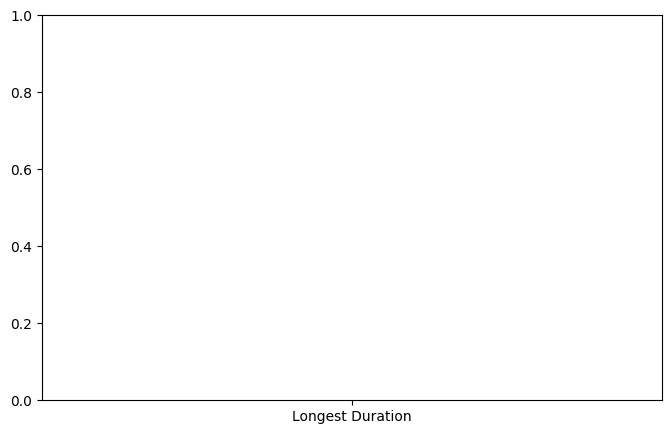

In [ ]:
durations = [longest, shortest]
labels = ['Longest Duration', 'Shortest Duration']
colors = ['skyblue', 'salmon']

# Create the bar chart
plt.figure(figsize=(8, 5))
plt.bar(labels, durations, color=colors)

# Add titles and labels
plt.title('Longest and Shortest Internship Durations')
plt.xlabel('Duration Type')
plt.ylabel('Duration (Days)')

# Add value labels on top of the bars
for i, value in enumerate(durations):
    plt.text(i, value + 5, str(value), ha='center')

# Show the plot
plt.show()